In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from utils import UnivariateAnalysis, StatisticAnalysis, BivariateAnalysis
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
prev = pd.read_csv('D:/Data Preparation final project group 2/Data/dseb63_previous_application.csv')
prev.head()

,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,SK_ID_CURR
0,2030495,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,293189
1,1696966,Consumer loans,68258.655,1800000.0,1754721.0,180000.0,1800000.0,SATURDAY,18,Y,1,0.101325,NaN,NaN,XAP,Refused,-472,Cash through the bank,SCO,NaN,Repeater,Clothing and Accessories,POS,XNA,Regional / Local,55,Furniture,36.0,low_normal,POS industry with interest,NaN,NaN,NaN,NaN,NaN,NaN,293189
2,2154916,Consumer loans,12417.390,108400.5,119848.5,0.0,108400.5,SUNDAY,14,Y,1,0.000000,NaN,NaN,XAP,Approved,-548,Cash through the bank,XAP,NaN,New,Furniture,POS,XNA,Stone,196,Furniture,12.0,middle,POS industry with interest,365243.0,-512.0,-182.0,-392.0,-387.0,0.0,293189
3,2802425,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,91587
4,1536272,Cash loans,21709.125,450000.0,512370.0,NaN,450000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-515,XNA,XAP,NaN,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),6,XNA,36.0,low_normal,Cash X-Sell: low,365243.0,-485.0,565.0,-155.0,-147.0,1.0,91587


In [4]:
prev.shape

(1413701, 37)

In [5]:
prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1413701 non-null  int64  
 1   NAME_CONTRACT_TYPE           1413701 non-null  object 
 2   AMT_ANNUITY                  1106483 non-null  float64
 3   AMT_APPLICATION              1413701 non-null  float64
 4   AMT_CREDIT                   1413700 non-null  float64
 5   AMT_DOWN_PAYMENT             664161 non-null   float64
 6   AMT_GOODS_PRICE              1094176 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1413701 non-null  object 
 8   HOUR_APPR_PROCESS_START      1413701 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1413701 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1413701 non-null  int64  
 11  RATE_DOWN_PAYMENT            664161 non-null   float64
 12  RATE_INTEREST_PRIMARY        4791 non-null

In [6]:
prev.duplicated().sum()

0

In [7]:
stat_analysis = StatisticAnalysis(prev)

SK_ID_PREV                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     307218
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                749540
AMT_GOODS_PRICE                 319525
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               749540
RATE_INTEREST_PRIMARY          1408910
RATE_INTEREST_PRIVILEGED       1408910
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 694672
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE                         0
SELLERPLACE_AREA         

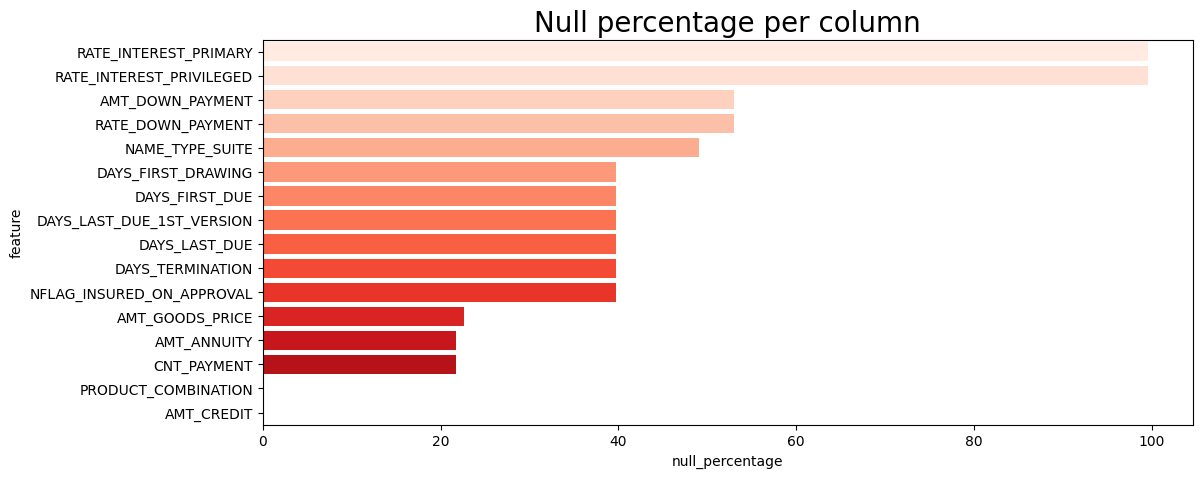

In [8]:
stat_analysis.check_null()

- Can drop RATE_INTEREST_PRIMARY, RATE_INTEREST_PRIVILEGED since 99% data is null

- Row contains null of PRODUCT_COMBINATION and AMT_CREDIT can be dropped too since null percentage is low

In [9]:
prev.drop(columns=['RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED'], inplace=True)

In [10]:
prev['AMT_CREDIT'].fillna(0, inplace=True)
prev['PRODUCT_COMBINATION'].fillna(prev['PRODUCT_COMBINATION'].mode()[0], inplace=True)

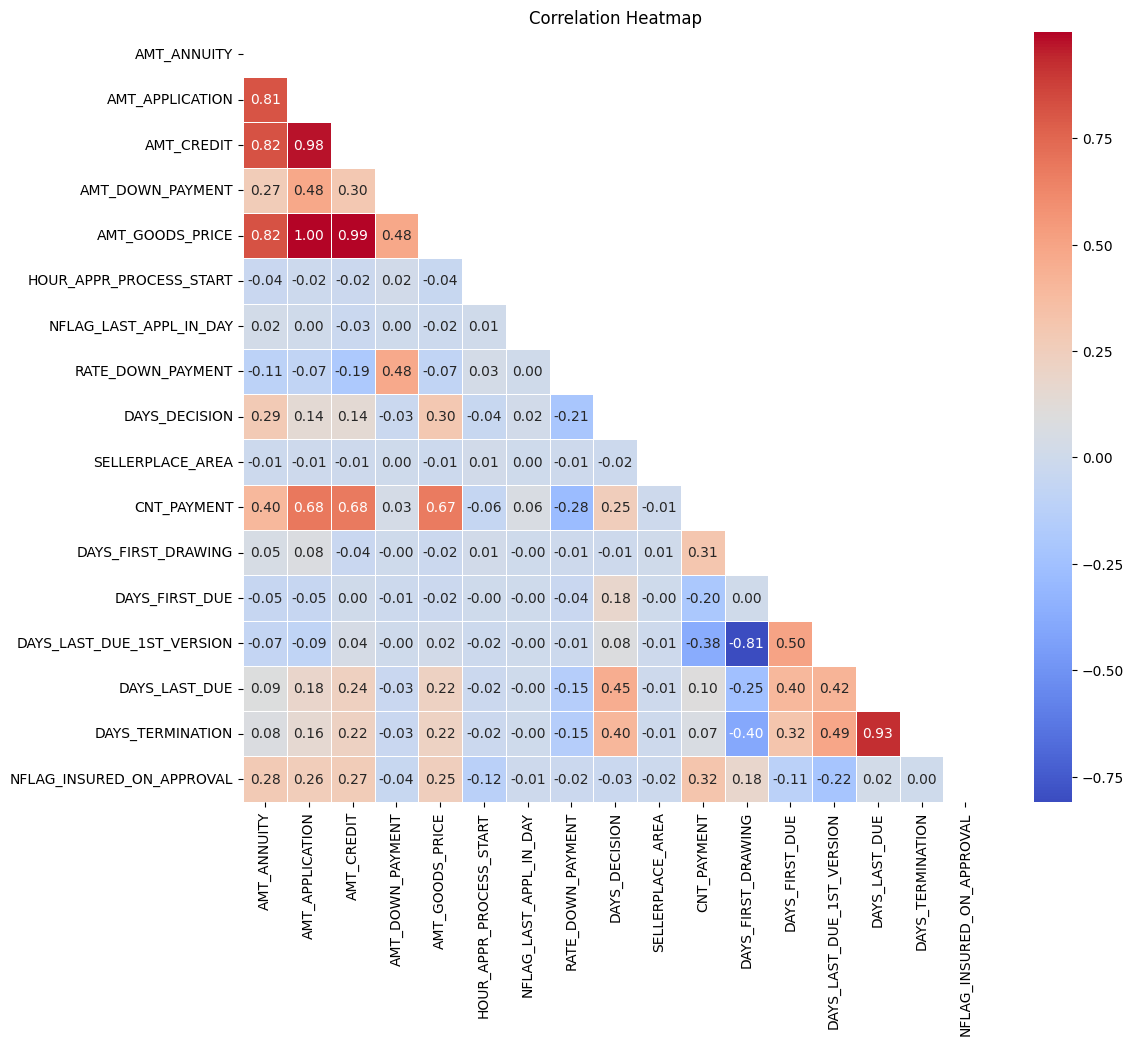

In [11]:
stat_analysis.correlation(drop_cols=['SK_ID_PREV', 'SK_ID_CURR'])

- AMT_APPLICATION, AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE are highly correlated
- DAY_DETERMINATION vs DAY_LAST_DUE are highly correlated
- DAY_LAST_DUE_1ST_VERSION vs DAY_FIRST_DRAWING are highly correlated

These feature may be excluded when training to avoid collinearity, inefficiency and unneccessary cost

### Univariate analysis

1. Contract product type

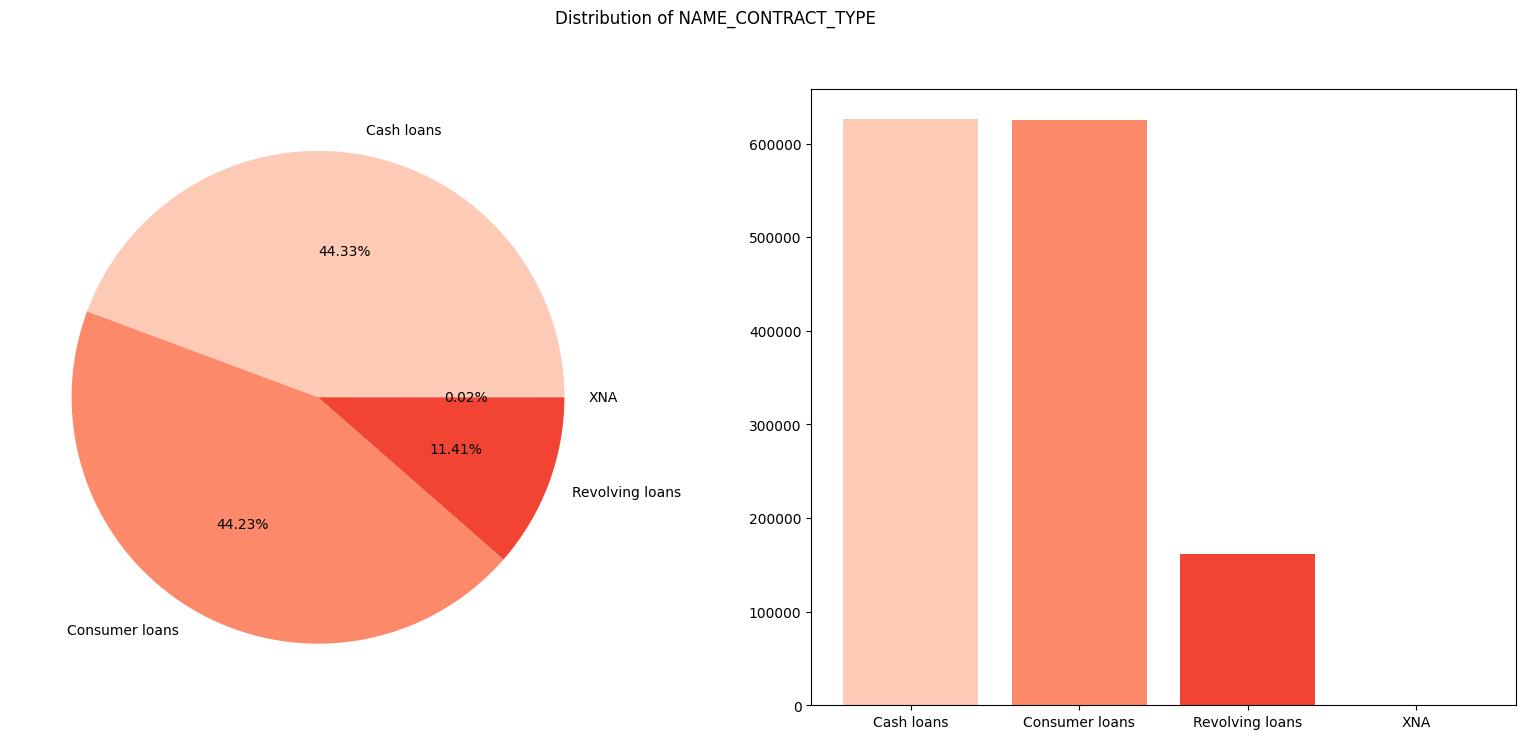

In [12]:
# contract = UnivariateAnalysis(prev['NAME_CONTRACT_TYPE'])
# contract.visualize()
contract = UnivariateAnalysis(prev)
contract.visualize(x='NAME_CONTRACT_TYPE')

2. On which day highest number of clients applied in previous application

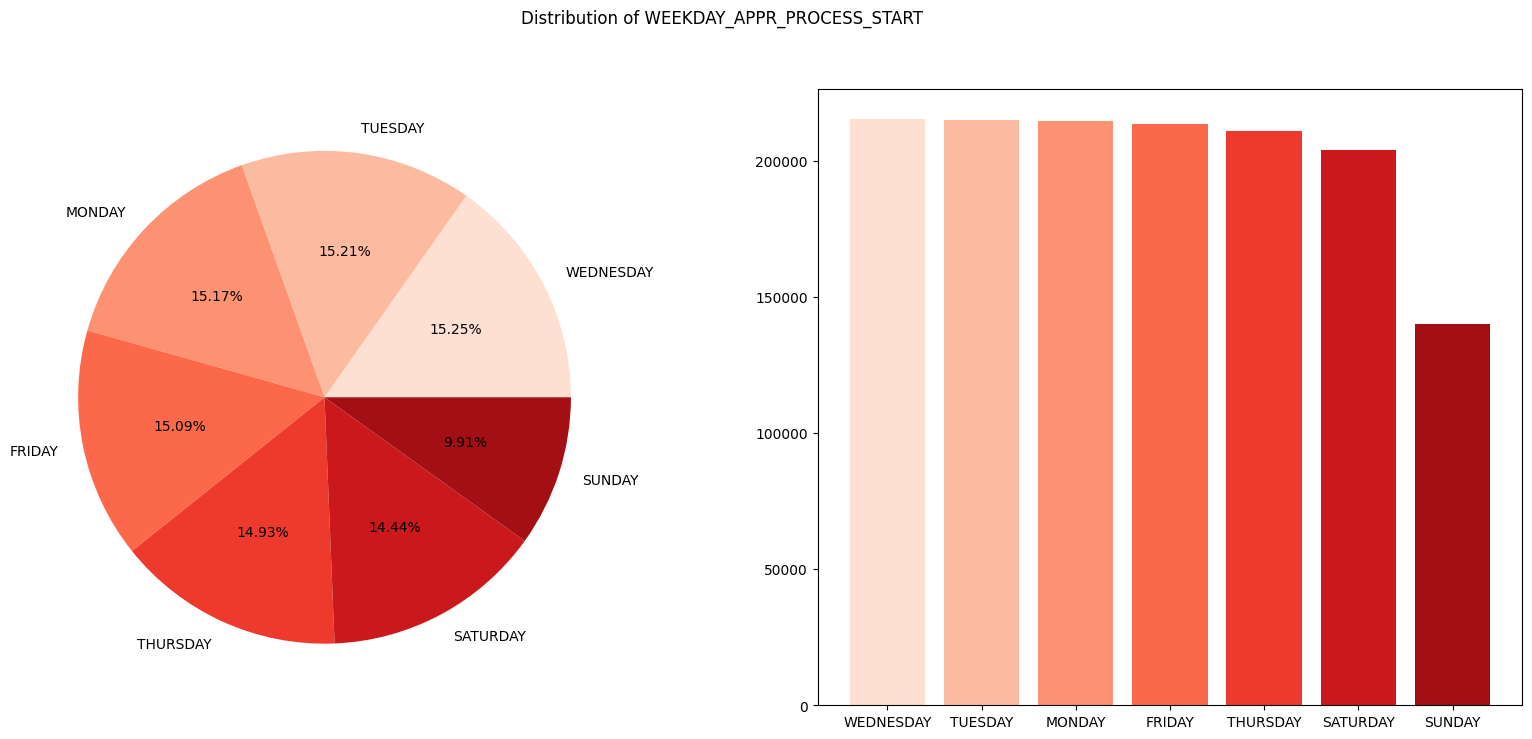

In [13]:
# day_apply = UnivariateAnalysis(prev['WEEKDAY_APPR_PROCESS_START'])
# day_apply.visualize()
day_apply = UnivariateAnalysis(prev)
day_apply.visualize(x='WEEKDAY_APPR_PROCESS_START')

The number of customer apply on weekday is quite simliar, while the figure for Sunday is significant lower

3. Purpose for cash loan in previous application

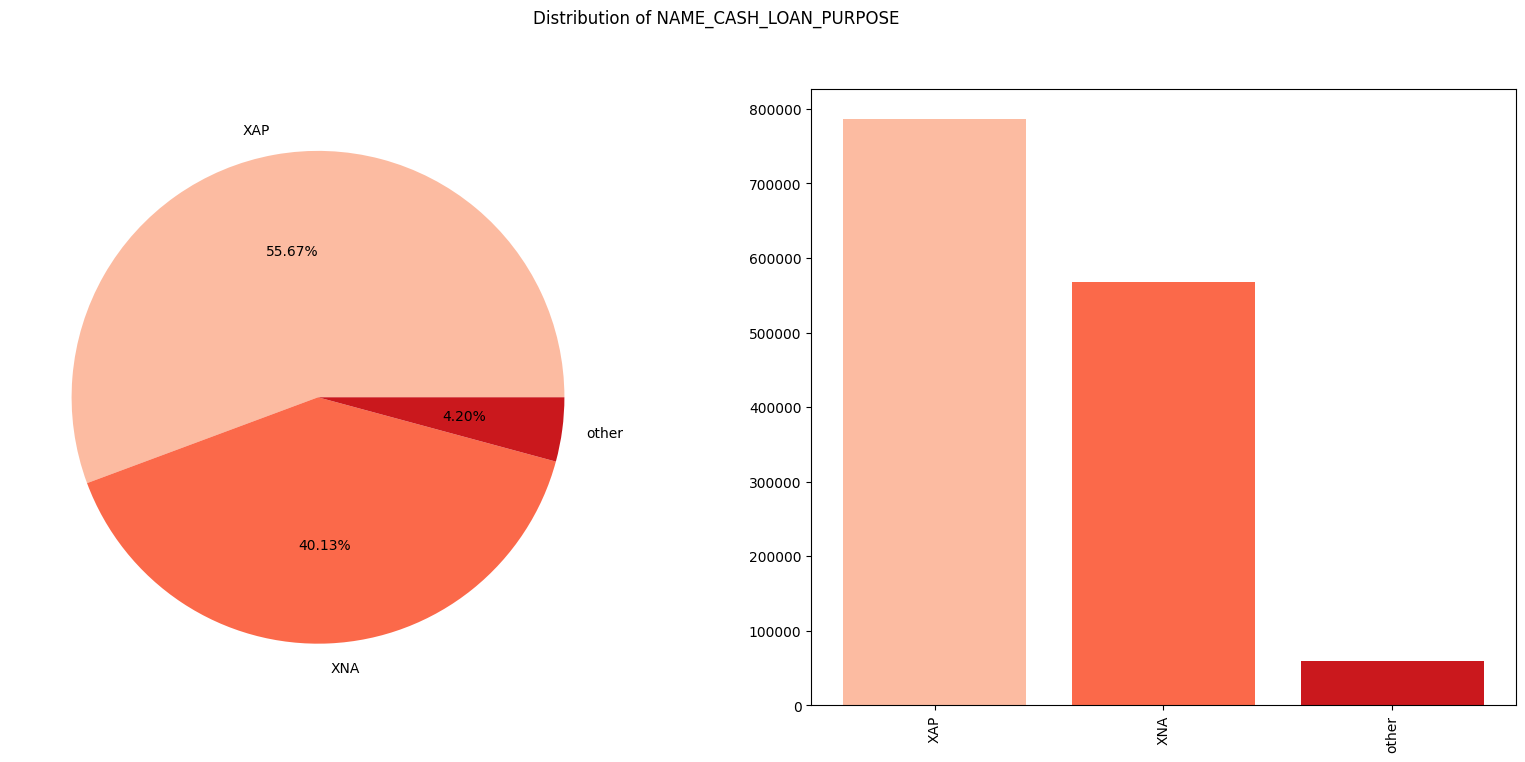

In [14]:
# loan_purpose = UnivariateAnalysis(prev['NAME_CASH_LOAN_PURPOSE'])
# loan_purpose.visualize(rotate=90)
loan_purpose = UnivariateAnalysis(prev)
loan_purpose.visualize(x='NAME_CASH_LOAN_PURPOSE', rotate=90, create_other=True)

- The purpose for most of the Loan Applications is XAP, which is followed by XNA. However, the definition of these terms is not provided in the columns_description.csv.
- This may mean that the loan application purpose was not shared by the applicant, though we cannot be sure.

4. Contract was approved or not in previous application

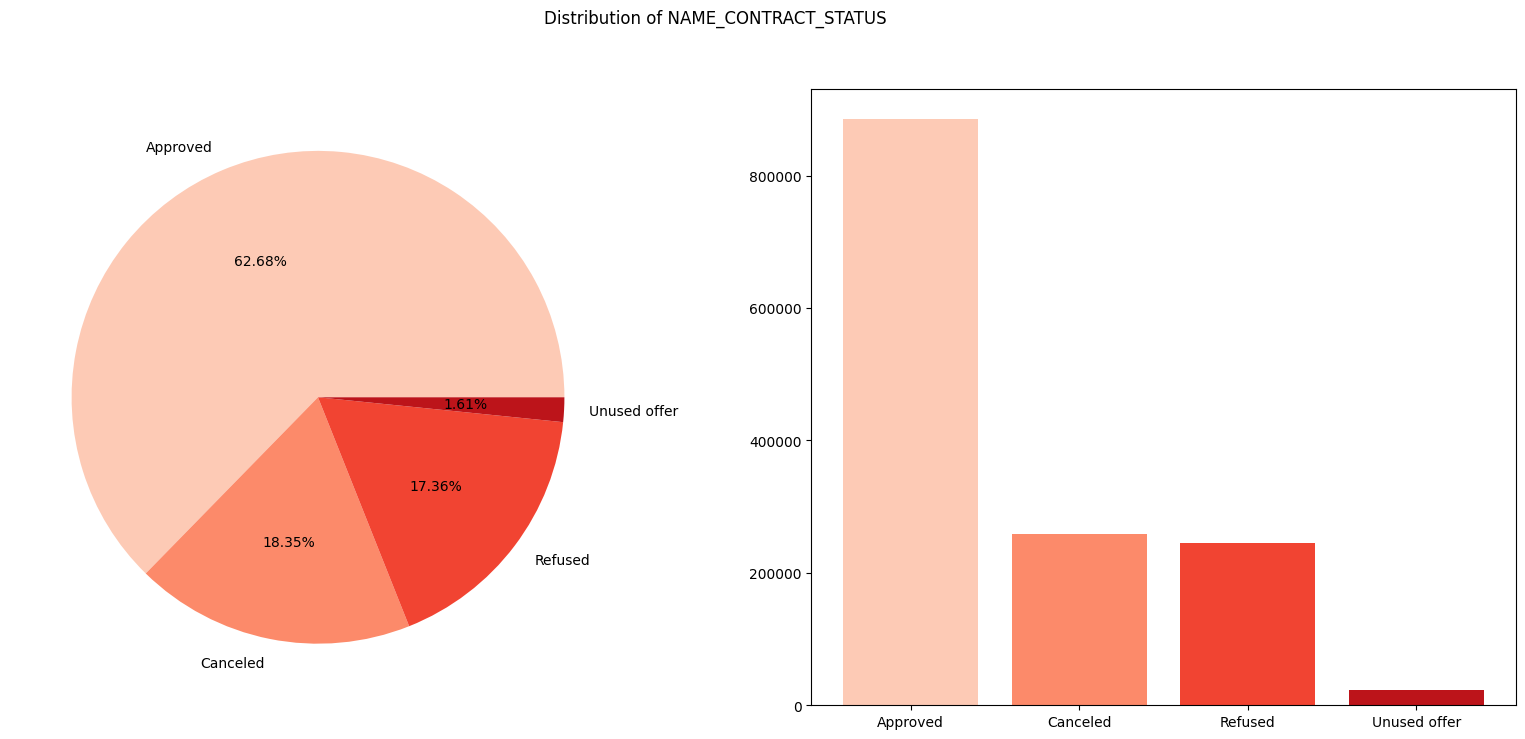

In [15]:
contract_stat = UnivariateAnalysis(prev)
contract_stat.visualize(x='NAME_CONTRACT_STATUS')

- Most of the previous applications for the clients were approved.
- This is followed by applications that were cancelled and refused.
- There were very few applications that were approved but the loans were unused by the applicant.

5. Payment method that client choose to pay for the previous application

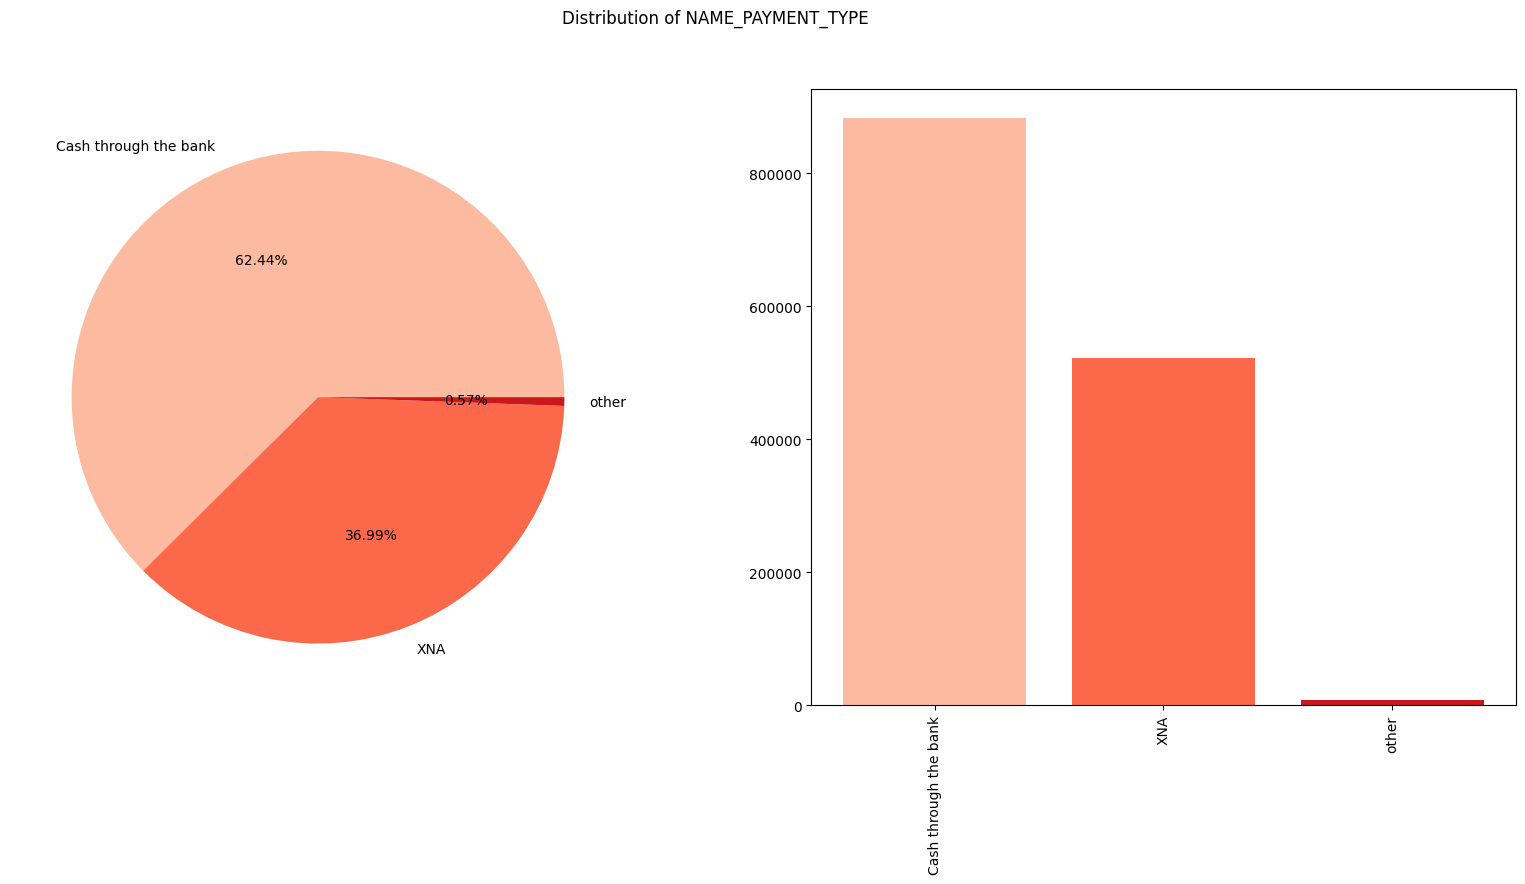

In [16]:
pay_med = UnivariateAnalysis(prev)
pay_med.visualize(x='NAME_PAYMENT_TYPE', rotate=90, create_other=True)

- The Payment Type basically refers to the Payment Method that the client chose to pay for the previous application, and as we can see here, most of the clients chose to pay via Cash through the Bank for the same.
- This is followed by people whose payment type is XNA.

6. Why the previous application rejected?

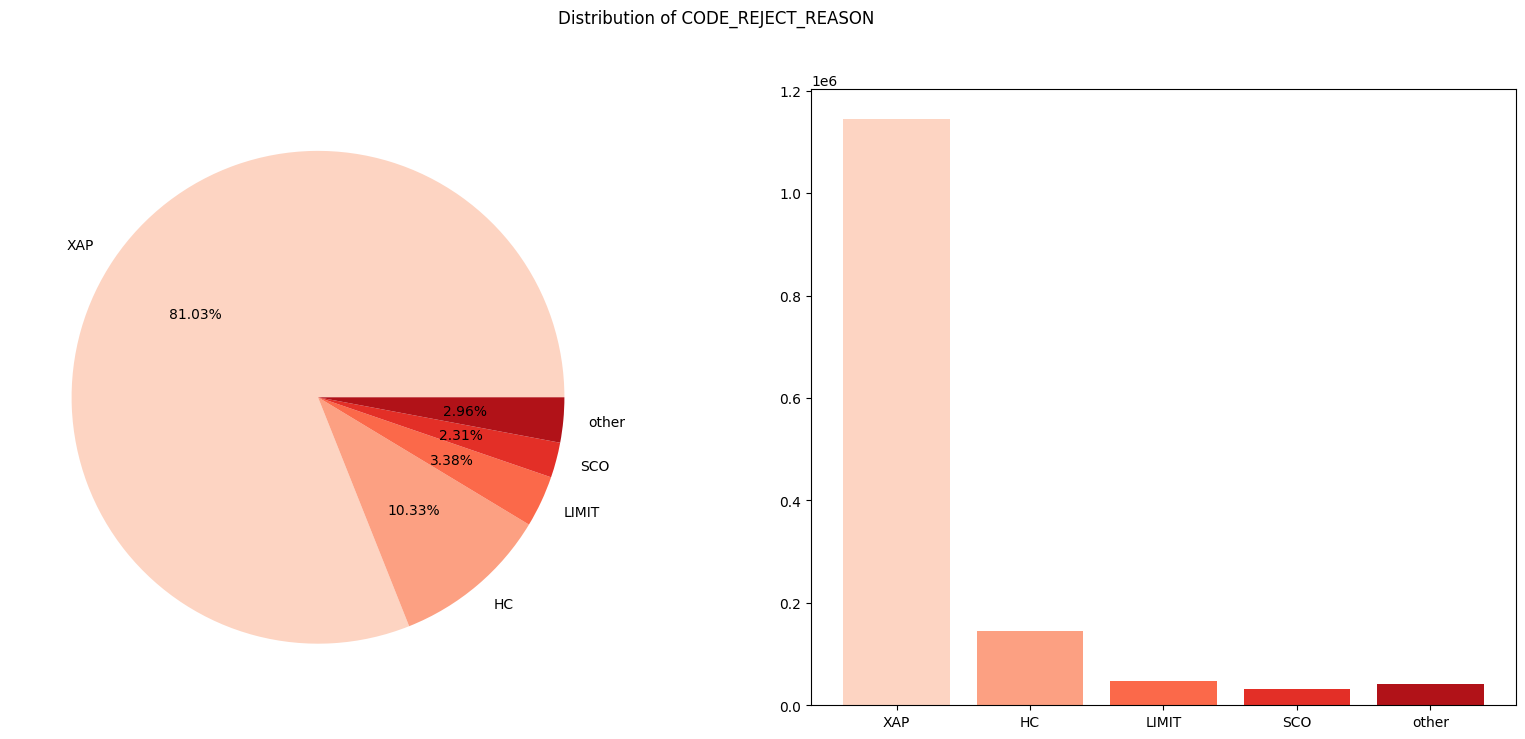

In [17]:
prev_rejected = UnivariateAnalysis(prev)
prev_rejected.visualize(x='CODE_REJECT_REASON', create_other=True)

- Code_Reject_Reason basically refers to the reason why the previous loan application of the client was rejected by the bank. As can be seen from here, in most of the cases XAP, was the reason provided. (Not Applicable)
- This is followed by HC as the second most prominent reason.

7. Who accompanied client when applying for the previous application

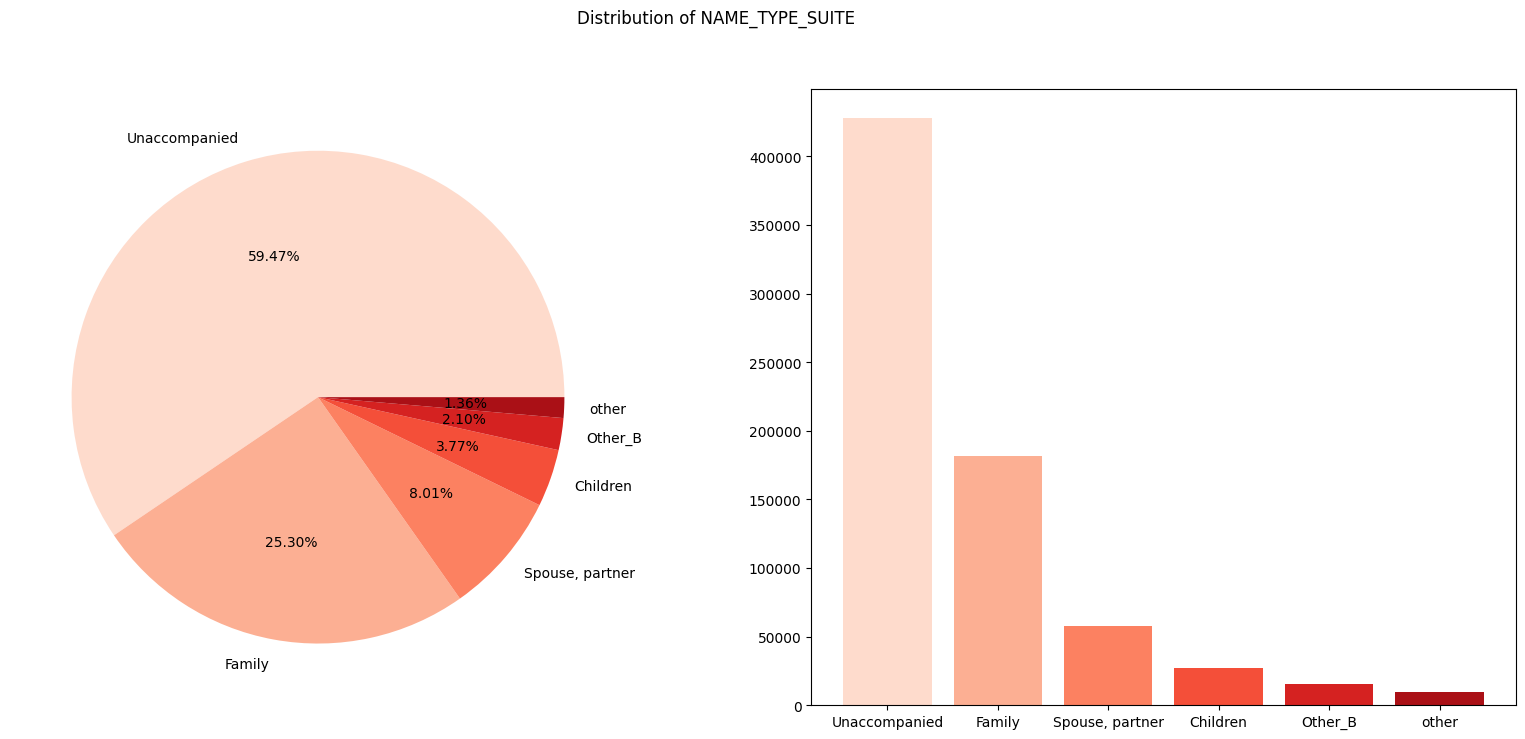

In [18]:
acc = UnivariateAnalysis(prev)
acc.visualize(x='NAME_TYPE_SUITE', create_other=True)

8. Was the client old or new client when applying for previous application

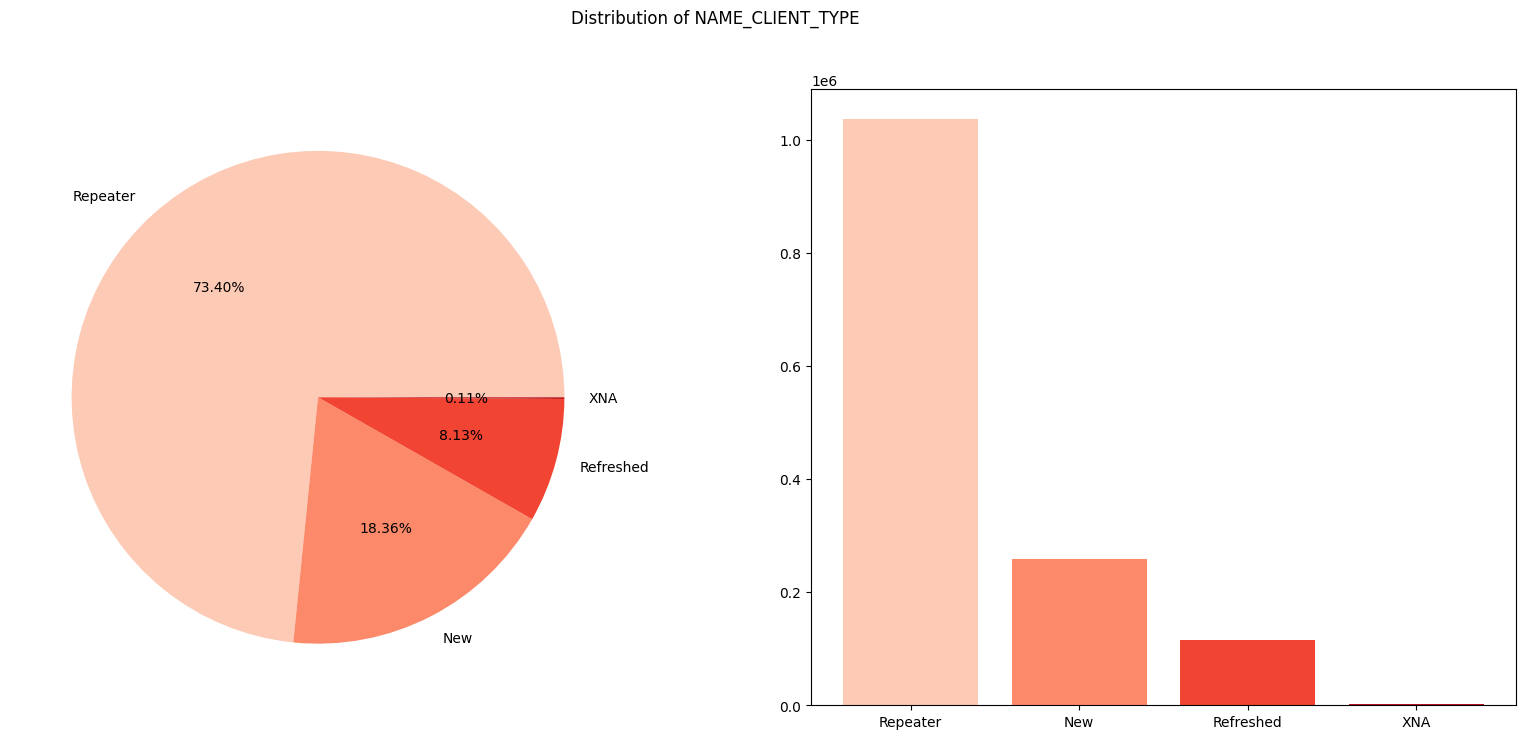

In [19]:
old_new = UnivariateAnalysis(prev)
old_new.visualize(x='NAME_CLIENT_TYPE')

This particular column defines whether the client was old or new when he/she was applying for the previous application. We can see from here that most of the applicants for the previous application were repeaters and there were very few first time applicants.

 9. What kind of goods did the client apply for in the previous application

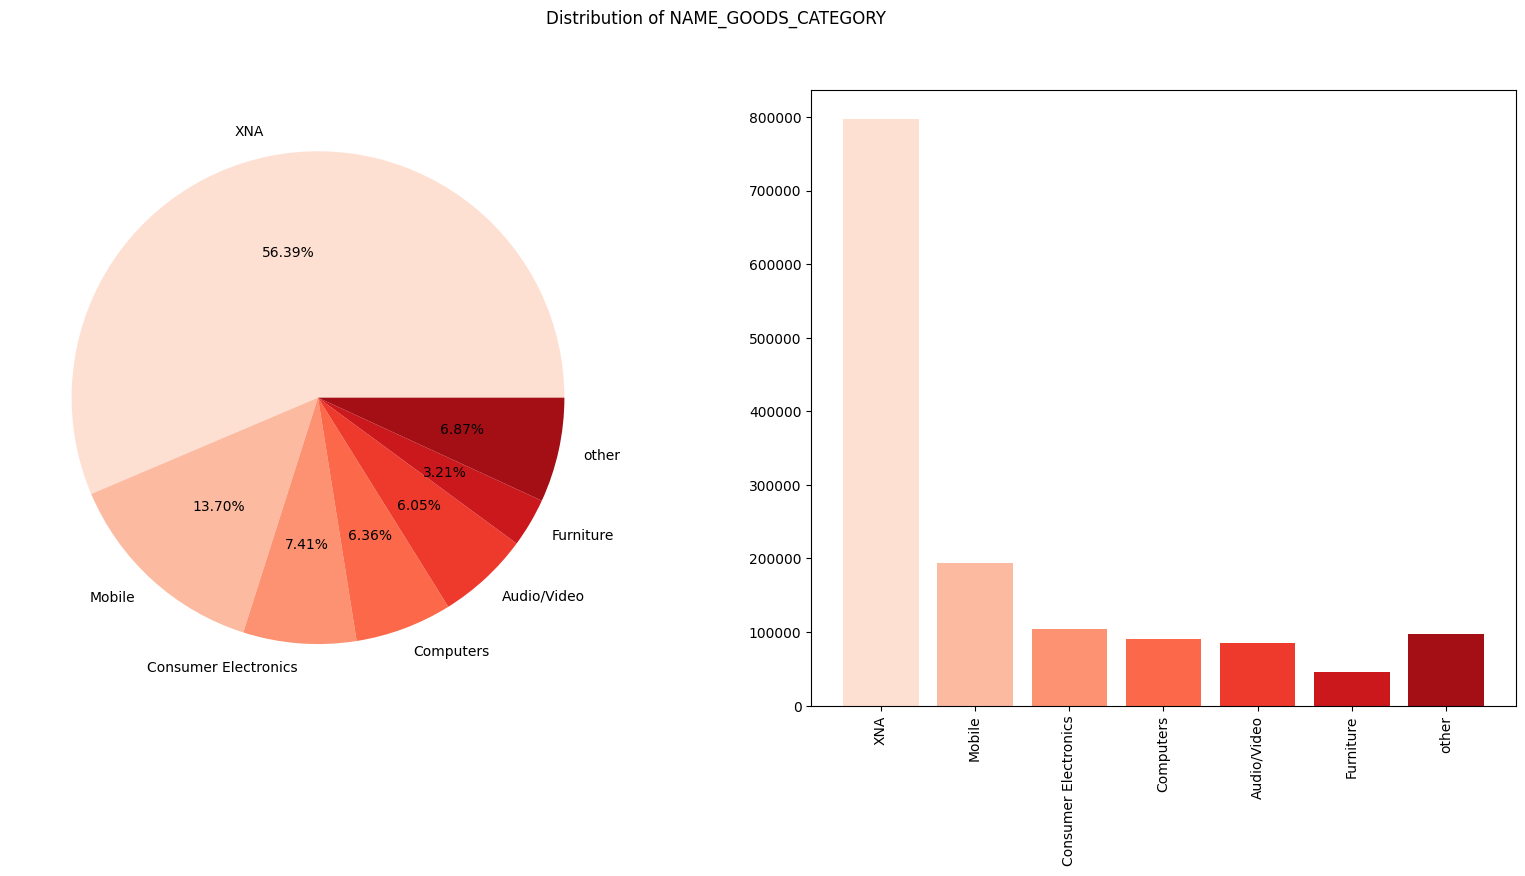

In [20]:
goods = UnivariateAnalysis(prev)
goods.visualize(x='NAME_GOODS_CATEGORY', rotate=90, create_other=True)

This defines the kind of goods that the client applied for in the previous application, and as can be seen, XNA is the most popular goods category followed by Mobiles.

10 Was the previous application for CASH, POS, CAR, …

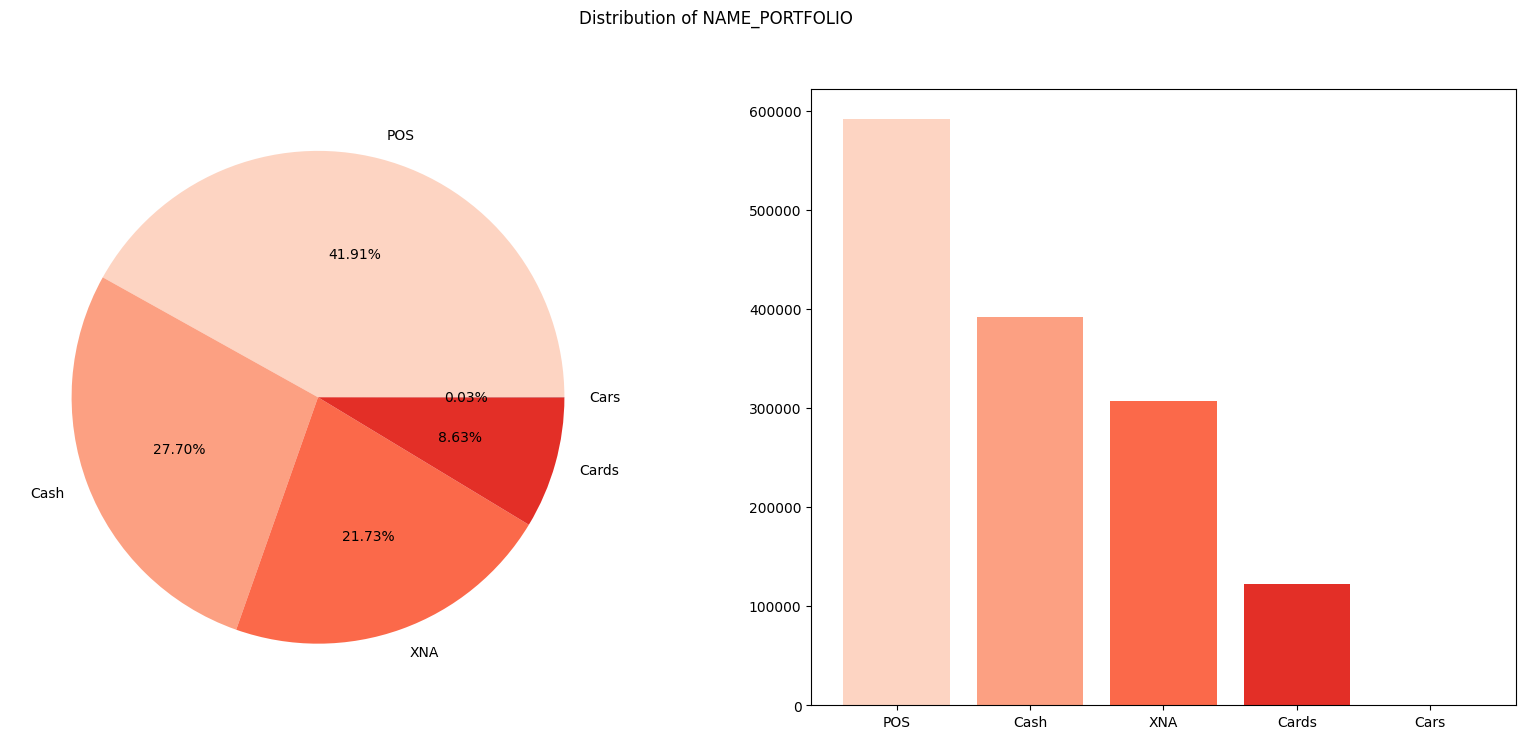

In [21]:
portfolio = UnivariateAnalysis(prev)
portfolio.visualize(x='NAME_PORTFOLIO')

This shows that most of the previous applications were for POS, which is followed by Cash and XNA.

11. Was the previous application x-sell or walk-in ?

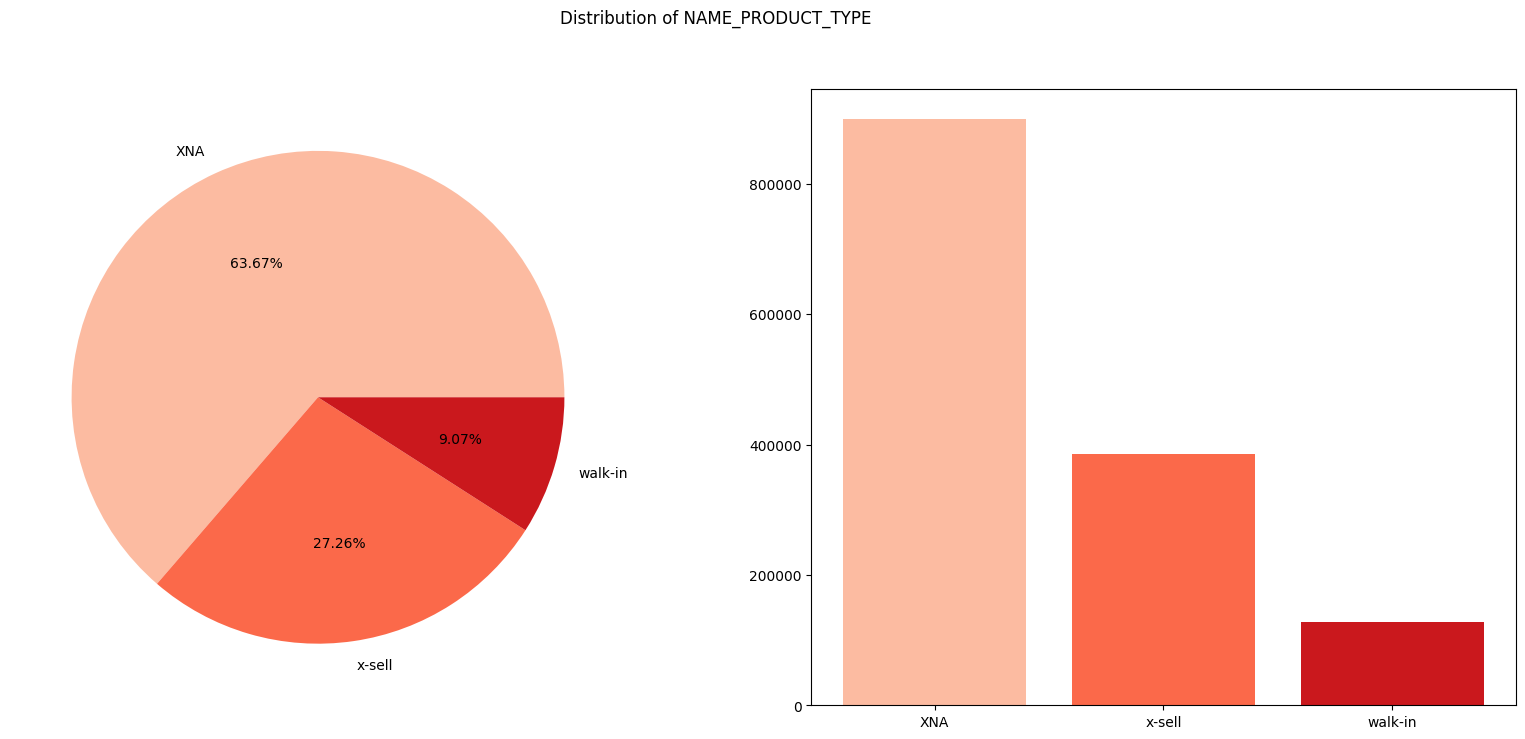

In [22]:
prod_type = UnivariateAnalysis(prev)
prod_type.visualize(x='NAME_PRODUCT_TYPE')

12. Top channels through which they acquired the client on the previous application

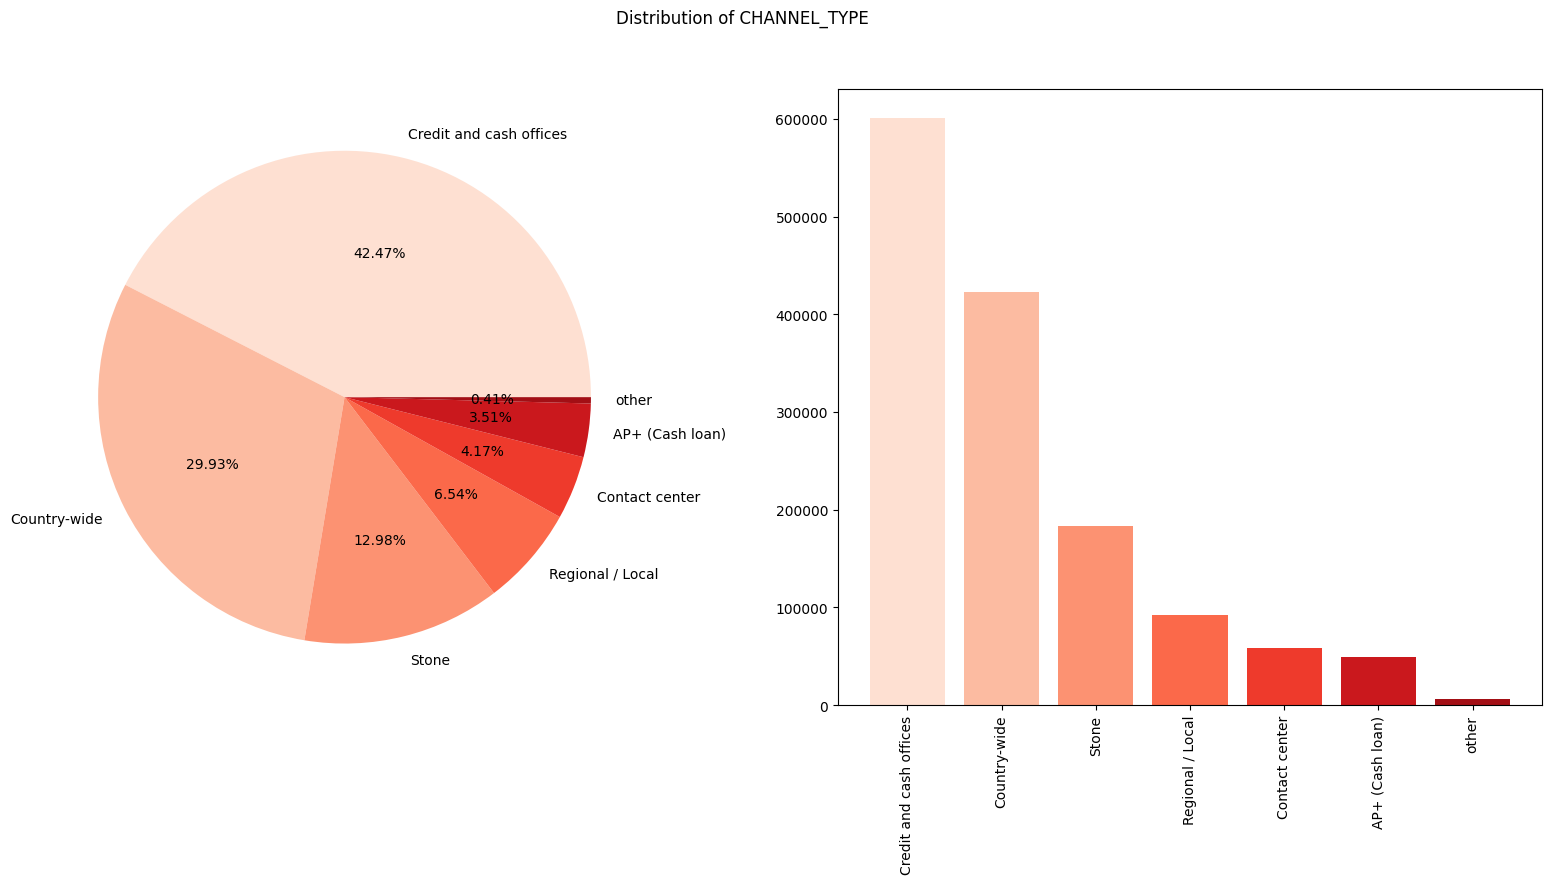

In [23]:
top_channel = UnivariateAnalysis(prev)
top_channel.visualize(x='CHANNEL_TYPE', rotate=90, create_other=True)

This shows that the banks obtained most of the clients in their previous application through Credit and Cash offices, which is followed by Country-wide.

13. Top industry of the seller

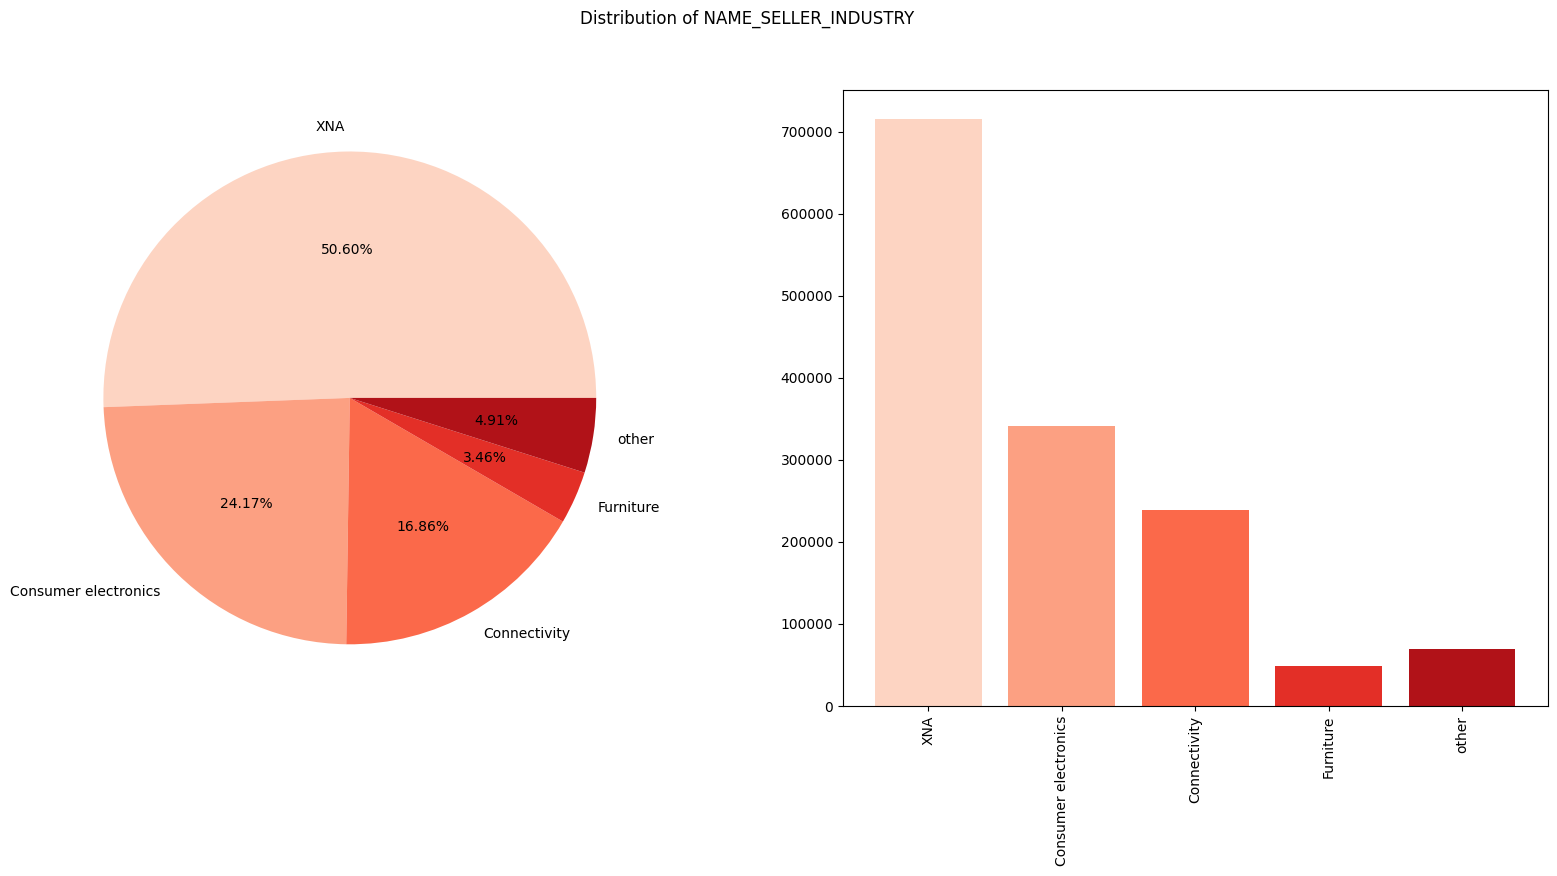

In [24]:
top_industry = UnivariateAnalysis(prev)
top_industry.visualize(x='NAME_SELLER_INDUSTRY', rotate=90, create_other=True)

14 Grouped interest rate into small medium and high of the previous application

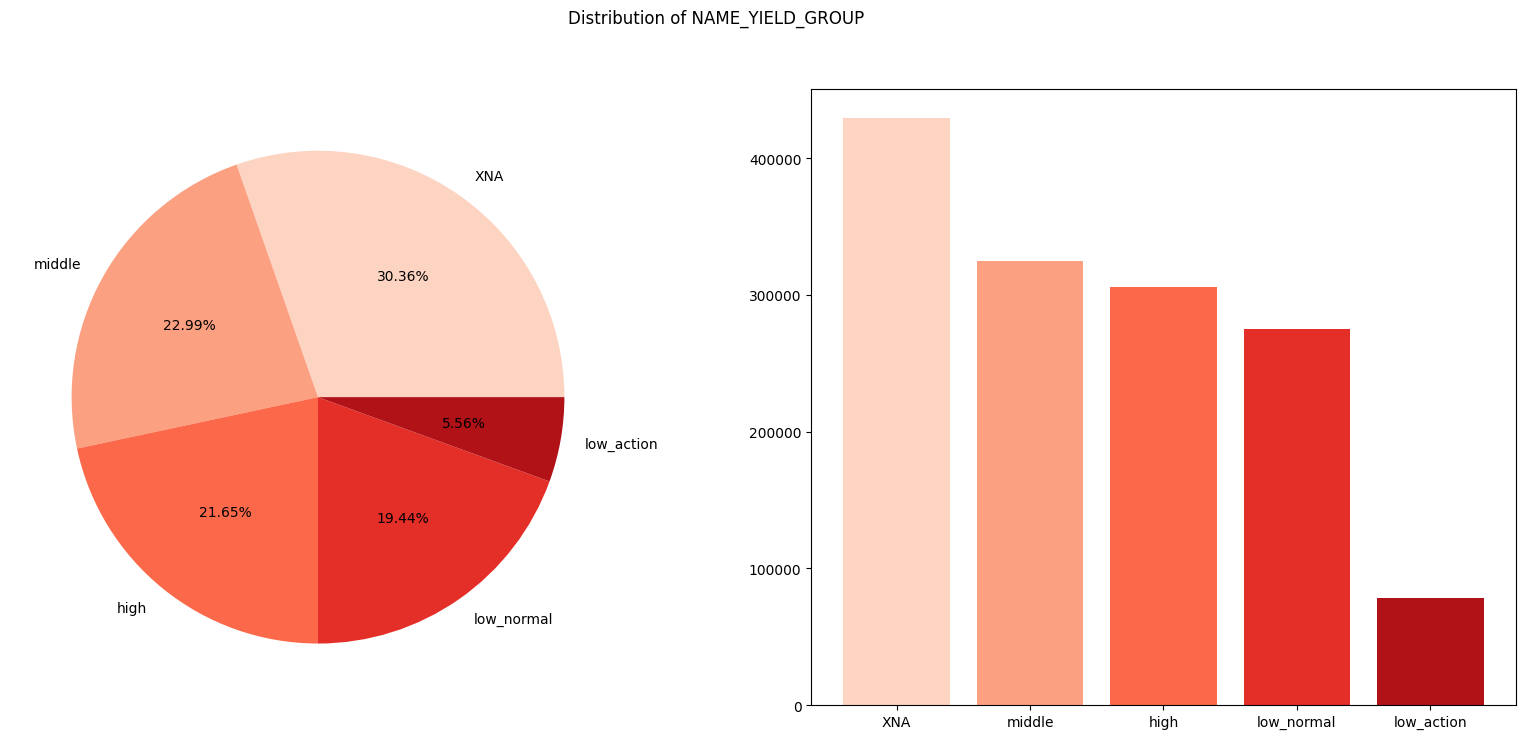

In [25]:
group = UnivariateAnalysis(prev)
group.visualize(x='NAME_YIELD_GROUP')

15 Top Detailed product combination of the previous application

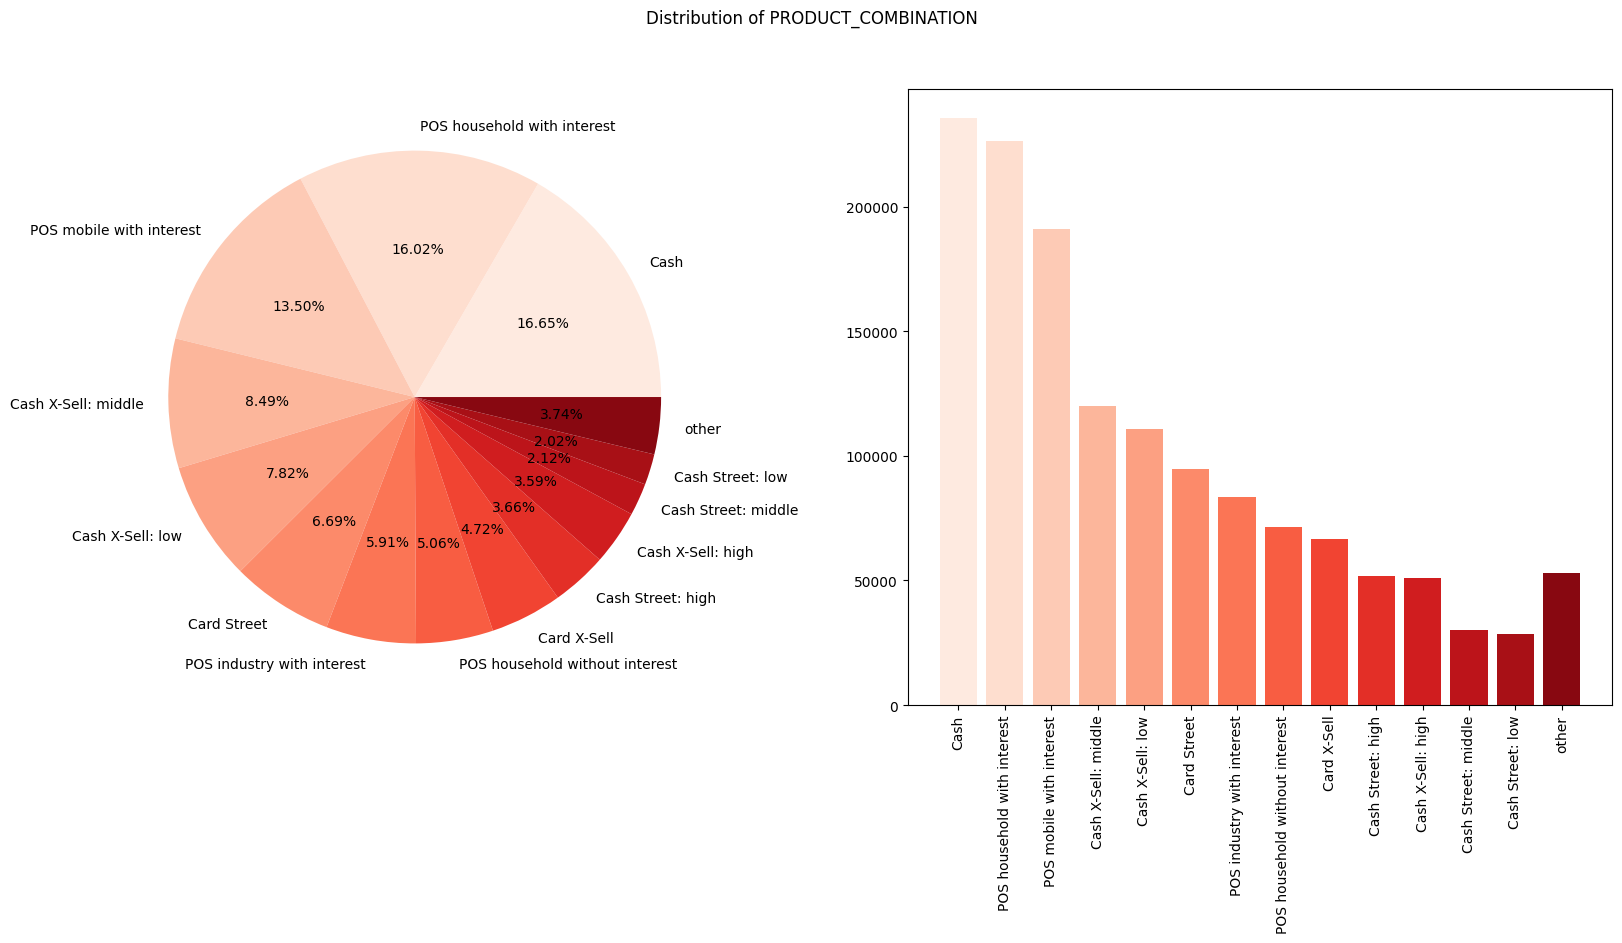

In [26]:
top_combination = UnivariateAnalysis(prev)
top_combination.visualize(x='PRODUCT_COMBINATION', rotate=90, create_other=True)

16. Did the client requested insurance during the previous application

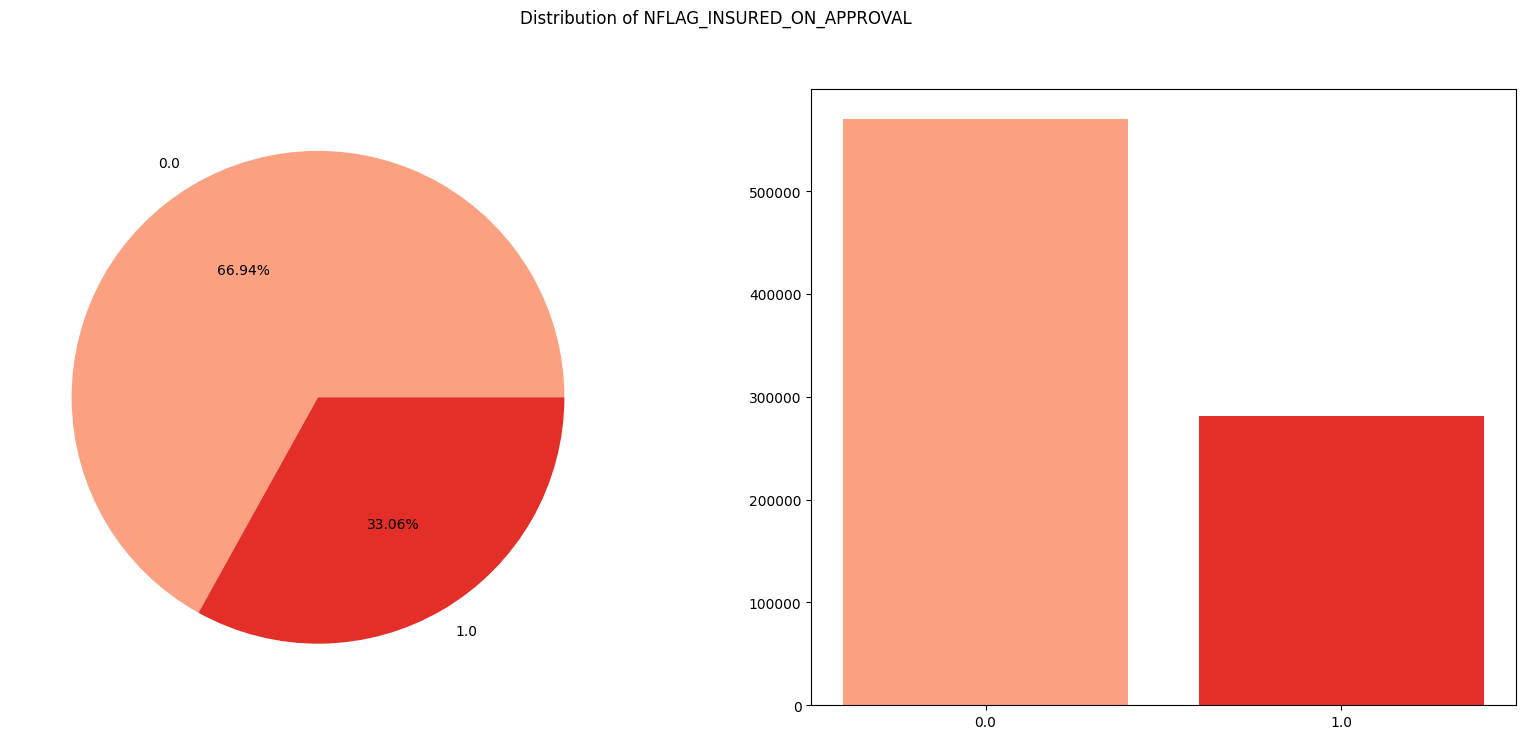

In [27]:
ins = UnivariateAnalysis(prev)
ins.visualize(x='NFLAG_INSURED_ON_APPROVAL')

## Bivariate Analysis

In [28]:
curr = pd.read_csv('D:/Data Preparation final project group 2/Data/dseb63_application_train.csv')
curr.head()

,Unnamed: 0,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR
0,0,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.796,0.0605,0.08,0.0345,0.2917,0.3333,0.013,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.804,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,278621
1,1,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,139008
2,2,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,138348
3,3,

In [29]:
curr.columns

Index(['Unnamed: 0', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'SK_ID_CURR'],
      dtype='object', length=123)

In [30]:
curr.drop(columns=['Unnamed: 0'], inplace=True)

In [31]:
curr.shape

(246009, 122)

In [32]:
prev_drop = prev.drop(columns=['SK_ID_PREV'])


In [33]:
prev_merged = pd.merge(curr[['SK_ID_CURR', 'TARGET']], prev, how='left', on='SK_ID_CURR')
prev_merged

,SK_ID_CURR,TARGET,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,278621,0,1810518.0,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12.0,Y,1.0,NaN,XNA,Approved,-746.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
1,278621,0,2636178.0,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17.0,Y,1.0,0.000000,XAP,Approved,-828.0,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
2,278621,0,2396755.0,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15.0,Y,1.0,0.100061,XAP,Approved,-2341.0,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
3,139008,0,2078043.0,Cash loans,24246.000,675000.0,675000.0,NaN,675000.0,THURSDAY,15.0,Y,1.0,NaN,XNA,Approved,-181.0,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,48.0,low_normal,Cash X-Sell: low,365243.0,-151.0,1259.0,-151.0,-143.0,0.0
4,139008,0,2827850.0,Revolving loans,NaN,0.0,0.0,NaN,NaN,THURSDAY,15.0,Y,1.0,NaN,XAP,Canceled,-181.0,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1.0,XNA,NaN,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144069,258328,0,2073384.0,Cash loans,16400.610,229500.0,254340.0,NaN,229500.0,THURSDAY,12.0,Y,1.0,NaN,XNA,Approved,-648.0,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,24.0,middle,Cash X-Sell: middle,365243.0,-618.0,72.0,-558.0,-528.0,1.0
1144070,258328,0,1708056.0,Revolving loans,2250.000,45000.0,45000.0,NaN,45000.0,SUNDAY,14.0,Y,1.0,NaN,XAP,Refused,-456.0,XNA,HC,Unaccompanied,Repeater,XNA,Cards,walk-in,Country-wide,20.0,Connectivity,0.0,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
1144071,258328,0,1296007.0,Cash loans,30737.655,765000.0,1067940.0,NaN,765000.0,FRIDAY,14.0,Y,1.0,NaN,Repairs,Refused,-171.0,Cash through the bank,HC,Unaccompanied,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1.0,XNA,60.0,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
1144072,258328,0,2631384.0,Cash loans,54022.140,1170000.0,1271929.5,NaN,1170000.0,FRIDAY,14.0,Y,1.0,NaN,XNA,Approved,-787.0,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),6.0,XNA,36.0,low_normal,Cash X-Sell: low,365243.0,-756.0,294.0,-66.0,-64.0,0.0


In [34]:
prev_merged.duplicated().sum()

0

# Add some feature engineering feature


In [35]:
prev_merged['APPLICATION_CREDIT_DIFF'] = prev_merged['AMT_APPLICATION'] - prev_merged['AMT_CREDIT']
prev_merged['APPLICATION_CREDIT_RATIO'] = prev_merged['AMT_APPLICATION'] / prev_merged['AMT_CREDIT']
prev_merged["NEW_CNT_PAYMENT"] = pd.cut(x=prev_merged['CNT_PAYMENT'], bins=[0, 12, 60, 120], labels=["Short", "Middle", "Long"])
prev_merged["NEW_APP_CREDIT_RATE_RATIO"] = prev_merged["APPLICATION_CREDIT_RATIO"].apply(lambda x: 1 if (x <= 1) else 0)
prev_merged['NEW_APP_CREDIT_RATE_RATIO'] = prev_merged['NEW_APP_CREDIT_RATE_RATIO'].astype('O')
new_coding = {"0": "Yes", "1": "No"}
prev_merged['NEW_APP_CREDIT_RATE_RATIO'] = prev_merged['NEW_APP_CREDIT_RATE_RATIO'].replace(new_coding)

In [36]:
stat = StatisticAnalysis(prev_merged)

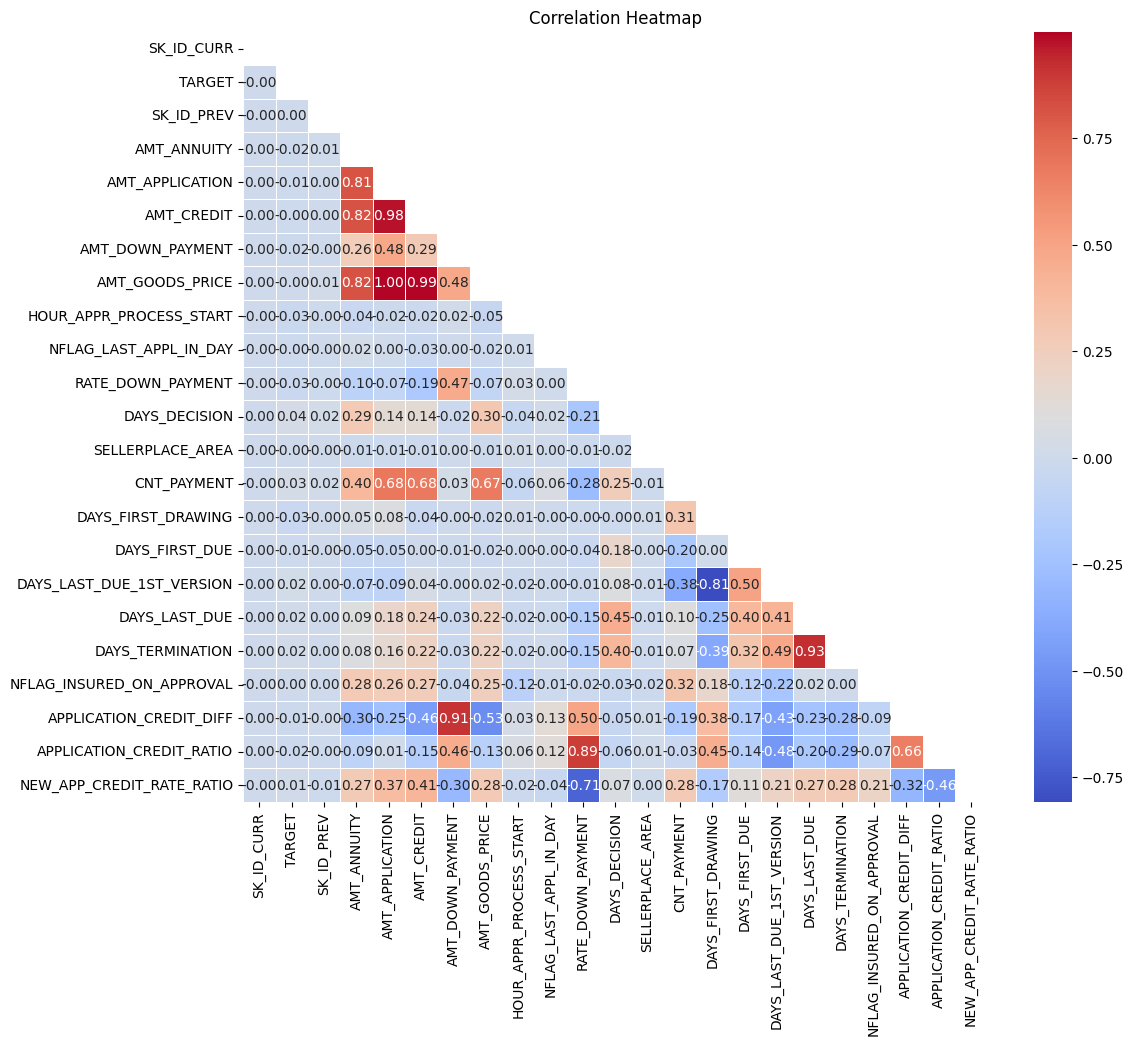

In [37]:
stat.correlation()

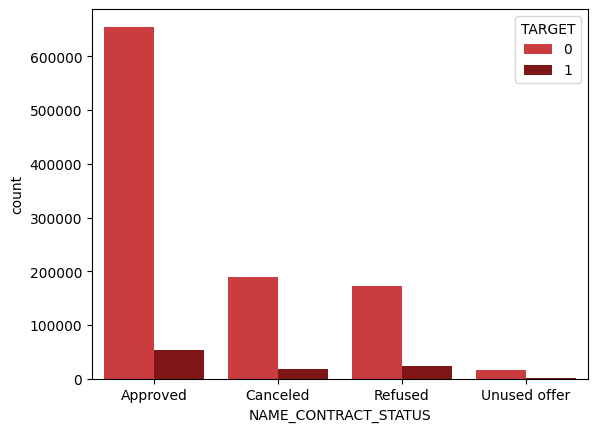

In [38]:
ax = sns.countplot(prev_merged, x='NAME_CONTRACT_STATUS', hue='TARGET', palette=['#E3242B', '#900603'])

In [39]:
default = prev_merged[prev_merged['TARGET']==1]
non_default = prev_merged[prev_merged['TARGET']==0]

In [40]:
total_approved = prev_merged[prev_merged['NAME_CONTRACT_STATUS'] == 'Approved'].shape[0]
default_approved = default[(prev_merged['NAME_CONTRACT_STATUS'] == 'Approved')].shape[0]
print(f'Default rate of customers who previous application was approved: {default_approved/total_approved * 100} %')

Default rate of customers who previous application was approved: 7.583832968893278 %


In [41]:
total_refused = prev_merged[prev_merged['NAME_CONTRACT_STATUS'] == 'Refused'].shape[0]
nondefault_refused = non_default[(prev_merged['NAME_CONTRACT_STATUS'] == 'Refused')].shape[0]
print(f'Non-default rate of customers who previous application was refused: {nondefault_refused/total_refused * 100} %')

Non-default rate of customers who previous application was refused: 88.08011176488584 %


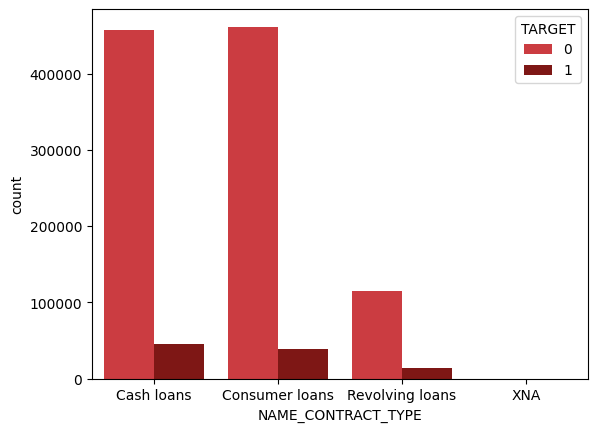

In [42]:
ax = sns.countplot(prev_merged, x='NAME_CONTRACT_TYPE', hue='TARGET', palette=['#E3242B', '#900603'])

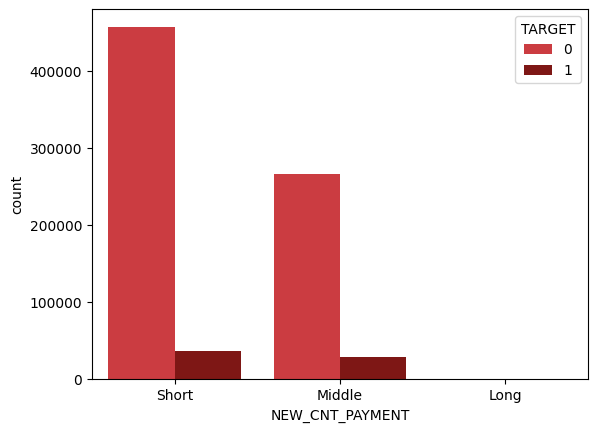

In [43]:
ax = sns.countplot(prev_merged, x='NEW_CNT_PAYMENT', hue='TARGET', palette=['#E3242B', '#900603'])

#### AMT_ANNUITY vs AMT_DOWN_PAYMENT

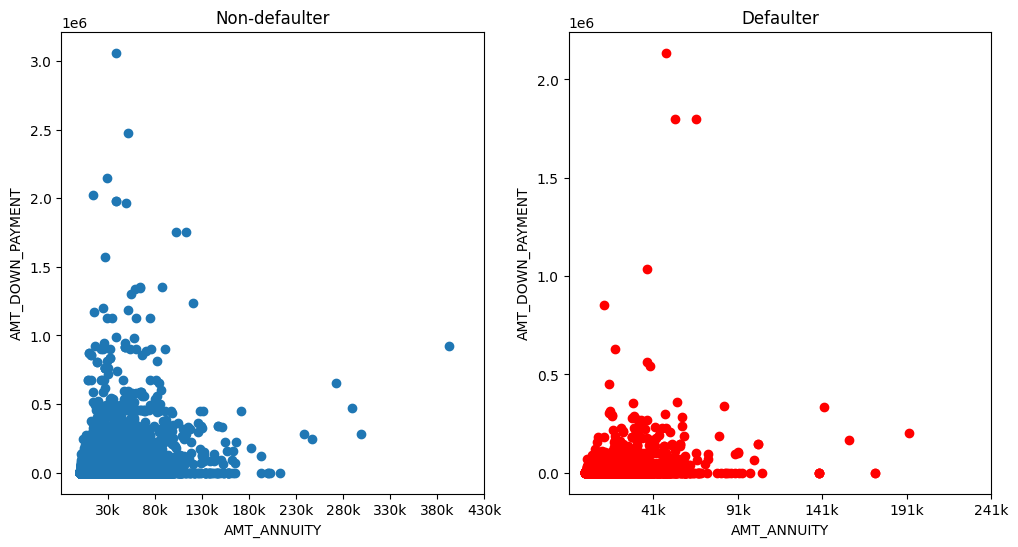

In [44]:
test = BivariateAnalysis()
test.scatter_plot(non_default, default, 'AMT_ANNUITY', 'AMT_DOWN_PAYMENT')

- Số tiền thanh toán hàng năm (AMT_ANNUITY) và số tiền đặt cọc (AMT_DOWN_PAYMENT) có mối quan hệ đối lập trong tệp khách hàng gặp vấn đề với việc trả nợ. Số tiền thanh toán hàng năm (AMT_ANNUITY) càng lớn thì lượng người vỡ nợ càng tăng. Ngược lại, số tiền đặt cọc càng lớn thì lượng người vỡ nợ càng giảm
- Nhóm khách hàng không gặp vấn đề với việc trả nợ thường có xu hướng có số tiền thanh toán hàng năm và số tiền đặt cọc cao hơn so với nhóm khách hàng gặp vấn đề với việc trả nợ


In [45]:
# fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
# sns.histplot(non_default, x='HOUR_APPR_PROCESS_START', ax=ax1, bins=24)
# ax1.set_title('Non-defaulter')
# sns.histplot(default, x='HOUR_APPR_PROCESS_START', ax=ax2, bins=24)
# ax2.set_title('Defaulter');

#### HOUR_PROCESS_START

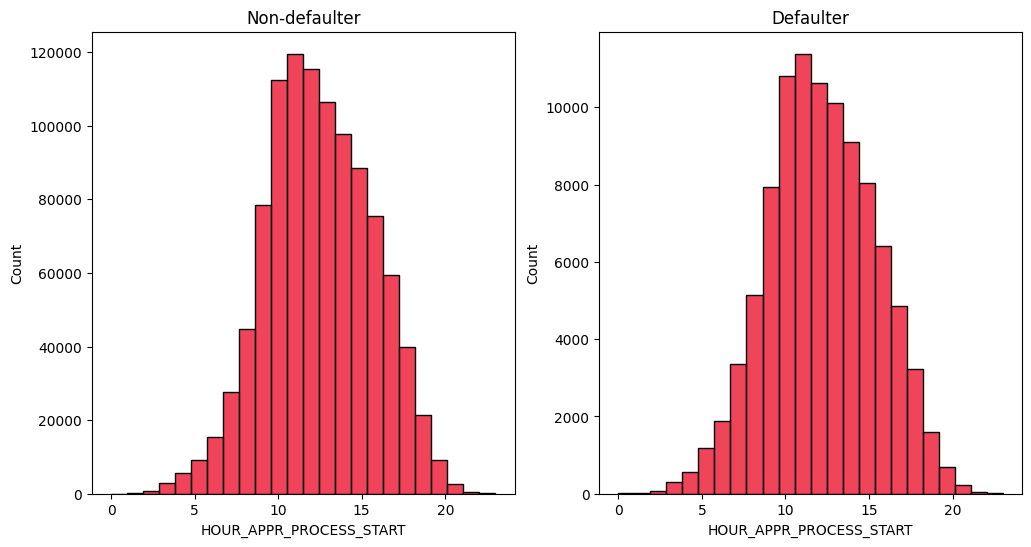

In [46]:
test.hist_plot(x="HOUR_APPR_PROCESS_START", df1=non_default, df2=default, bins=24)

- Khách hàng đăng kí vay nhiều nhất vào khoảng từ 10-12h
- Distribution cho 2 nhóm gần như giống nhau => Không mang nhiều giá trị dự đoán

#### WEEKDAY_APPR_PROCESS_START

In [47]:
# wks_nd = non_default['WEEKDAY_APPR_PROCESS_START'].value_counts().sort_values()
# wks_d = default['WEEKDAY_APPR_PROCESS_START'].value_counts().sort_values()

In [48]:
# fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
# ax1.bar(wks_nd.index, wks_nd.values)
# ax1.set_xticklabels(ax1.get_xticklabels(), rotation=60)
# ax1.set_title('Non-defaulter')

# ax2.bar(wks_d.index, wks_d.values)
# ax2.set_xticklabels(ax2.get_xticklabels(), rotation=60)
# ax2.set_title('Non-defaulter')

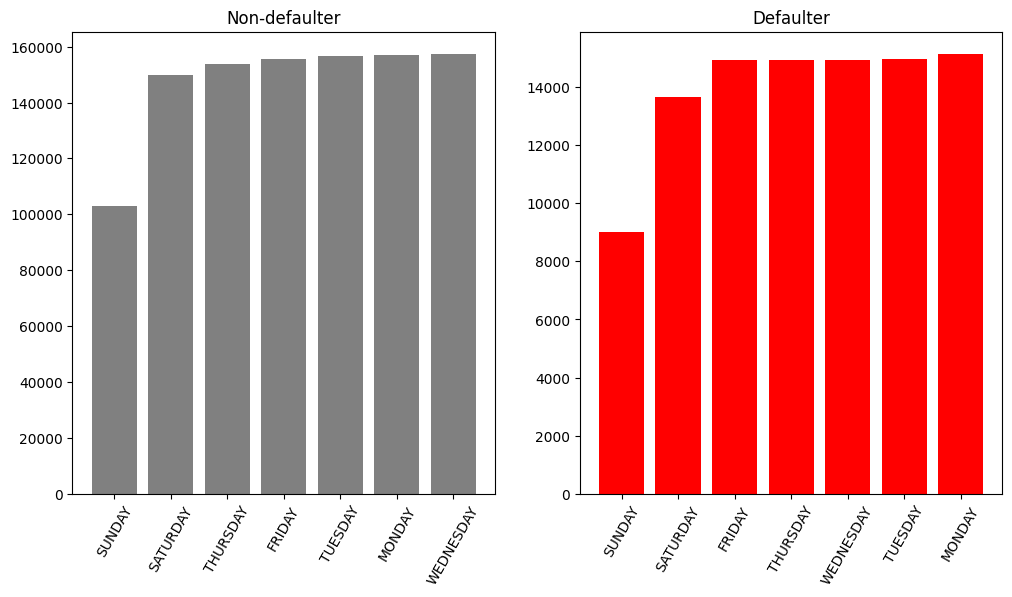

In [49]:
test.bar_plot(x='WEEKDAY_APPR_PROCESS_START', df1=non_default, df2=default, rotation=60)

Feature cho cả 2 nhóm đều khá giống nhau => Không có nhiều giá trị cho việc dự đoán target

#### DAYS_DECISION, DAYS_FIRST_DRAWING, DAYS_FIRST_DUE, DAYS_LAST_DUE, DAYS_LAST_DUE_1ST_VERSION, DAY_TERMINATION

DAYS_DECISION


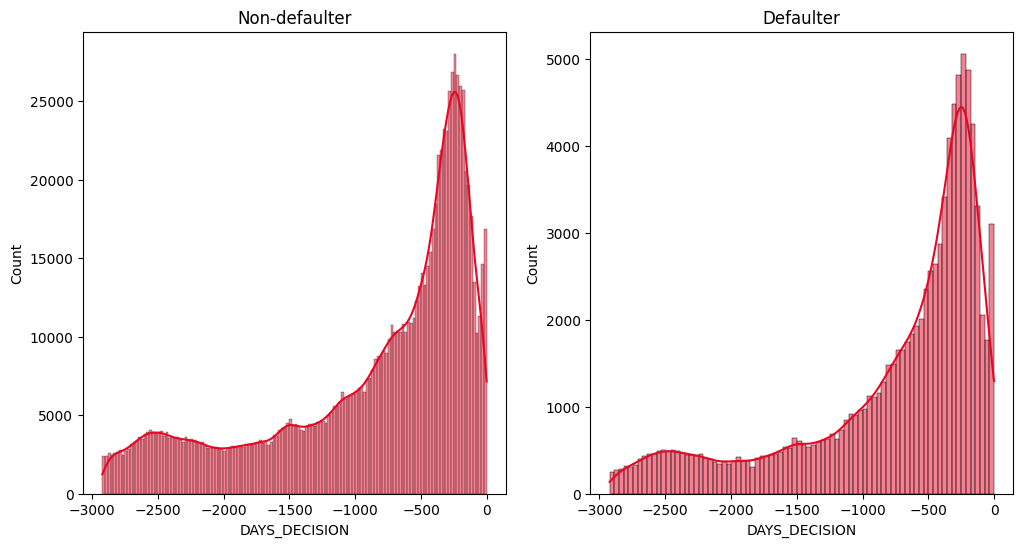

DAYS_FIRST_DRAWING


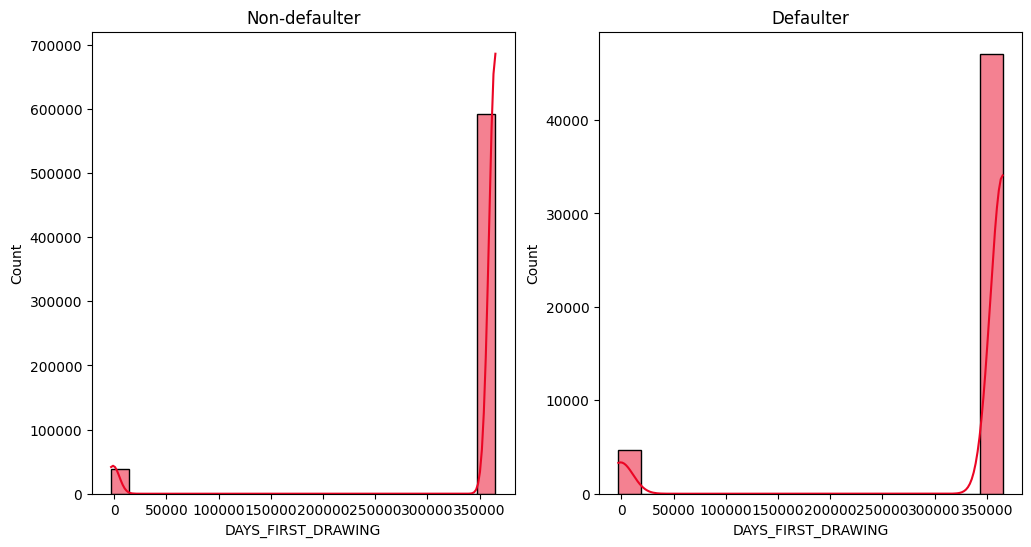

DAYS_FIRST_DUE


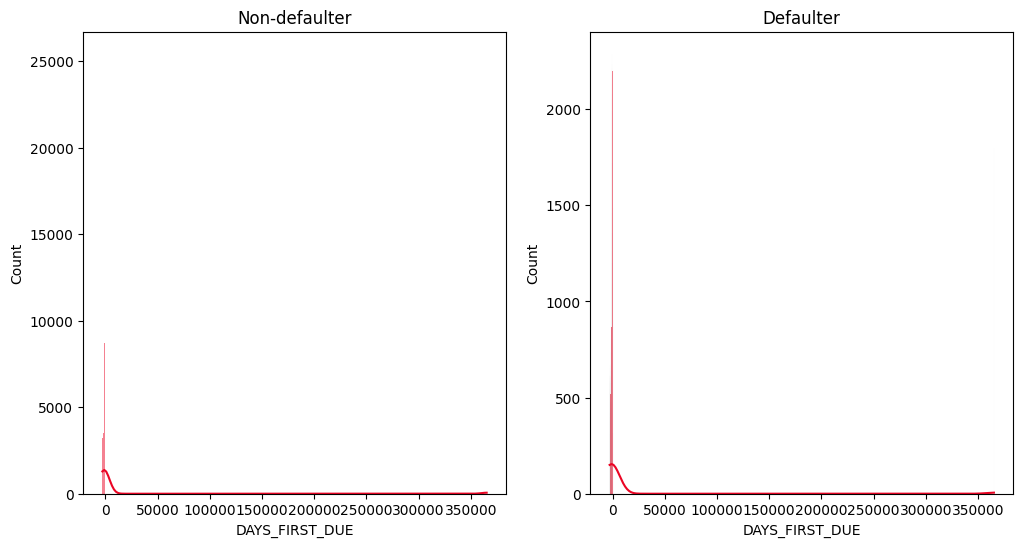

DAYS_LAST_DUE


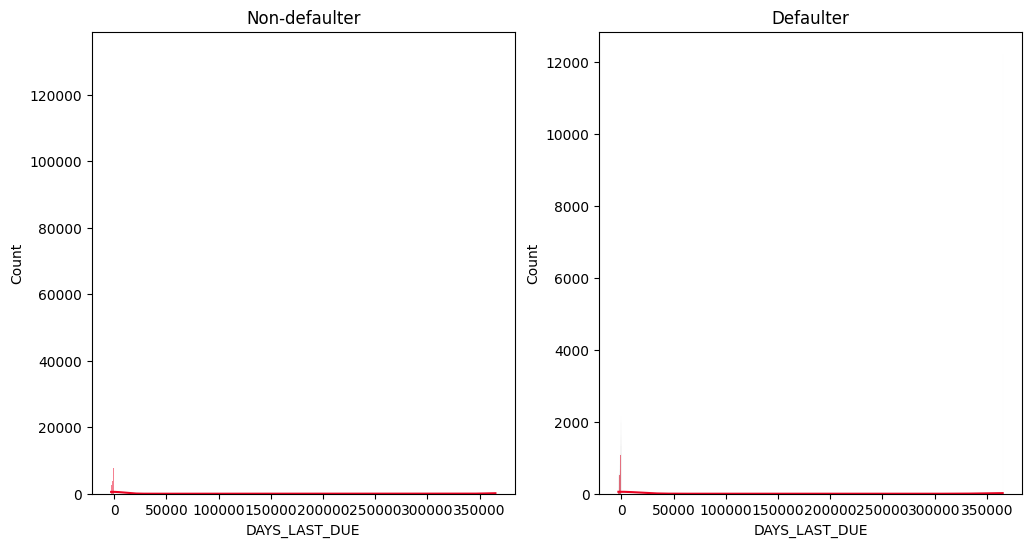

DAYS_LAST_DUE_1ST_VERSION


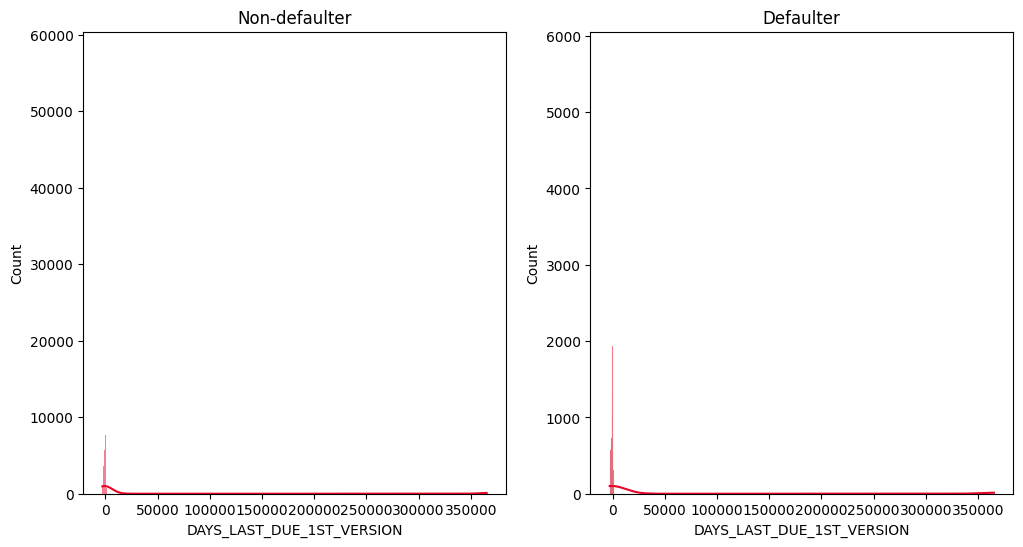

DAYS_TERMINATION


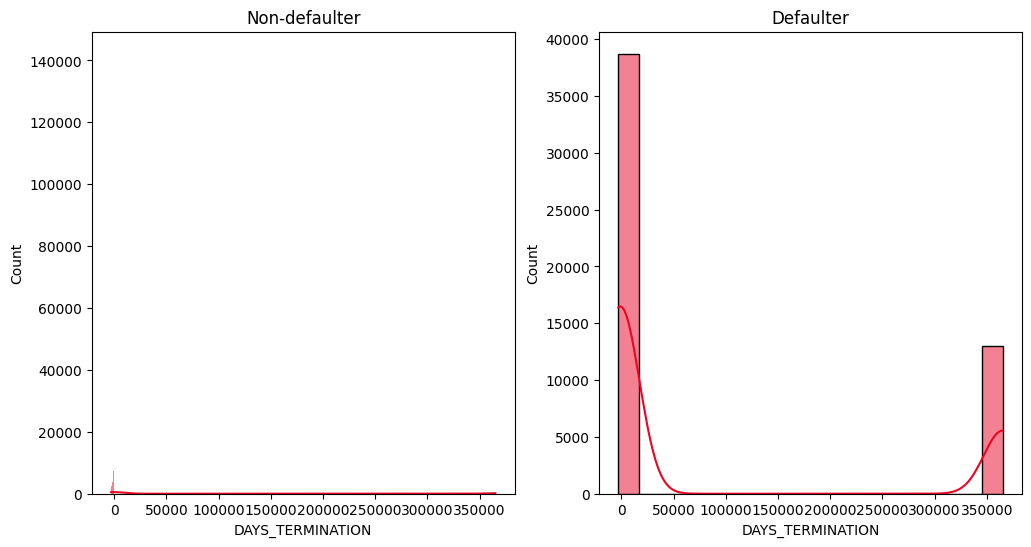

In [50]:
day_cols = ['DAYS_DECISION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_TERMINATION']
for c in day_cols:
    print(c)
    test.hist_plot(x=c, df1=non_default, df2=default, bins='auto', kde=True)

- DAY_DECISIONS, DAYS_FIRST_DRAWING, DAYS_FIRST_DUE, DAYS_LAST_DUE, DAYS_LAST_DUE_1ST_VERSION có distribution gần như giống nhau trên cả 2 nhóm => Không có nhiều tác động đến biến TARGET


### RATE_DOWN_PAYMENT

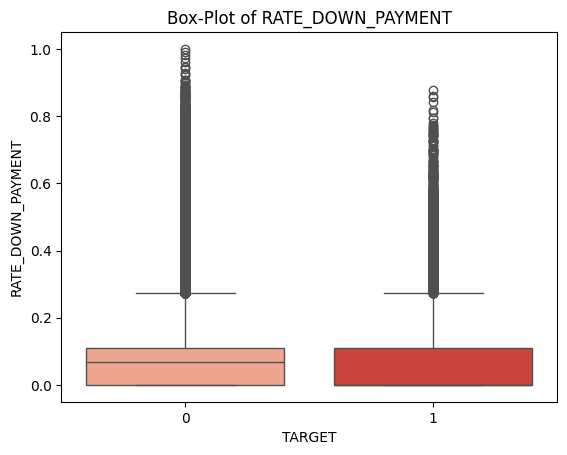

In [51]:
test.box_plot(y='RATE_DOWN_PAYMENT', data_to_plot=prev_merged)

In [52]:
print('Non-defaulter')
non_default['RATE_DOWN_PAYMENT'].describe()

Non-defaulter


count    490355.000000
mean          0.081100
std           0.108688
min          -0.000015
25%           0.000000
50%           0.067511
75%           0.108914
max           1.000000
Name: RATE_DOWN_PAYMENT, dtype: float64

In [53]:
print('Defaulter')
default['RATE_DOWN_PAYMENT'].describe()

Defaulter


count    40553.000000
mean         0.070795
std          0.099221
min          0.000000
25%          0.000000
50%          0.000000
75%          0.108909
max          0.878301
Name: RATE_DOWN_PAYMENT, dtype: float64

Khách hàng có RATE_DOWN_PAYMENT thấp hơn ở previous application thường có là người vỡ nợ

In [54]:
payment_cols = ['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT','AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE']

AMT_ANNUITY
Non-defaulters: count    811419.000000
mean      15908.567738
std       14842.117698
min           0.000000
25%        6286.590000
50%       11249.370000
75%       20490.885000
max      417927.645000
Name: AMT_ANNUITY, dtype: float64
Defaulters: count     73760.000000
mean      15066.338756
std       13509.809939
min           0.000000
25%        5905.518750
50%       10865.025000
75%       19828.485000
max      281027.250000
Name: AMT_ANNUITY, dtype: float64


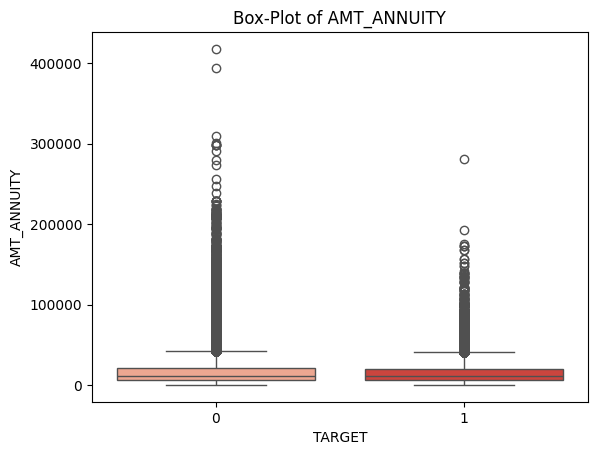

AMT_APPLICATION
Non-defaulters: count    1.033268e+06
mean     1.759222e+05
std      2.946799e+05
min      0.000000e+00
25%      2.020500e+04
50%      7.166700e+04
75%      1.800000e+05
max      5.850000e+06
Name: AMT_APPLICATION, dtype: float64
Defaulters: count    9.762300e+04
mean     1.691095e+05
std      2.849821e+05
min      0.000000e+00
25%      0.000000e+00
50%      6.606000e+04
75%      1.800000e+05
max      3.982500e+06
Name: AMT_APPLICATION, dtype: float64


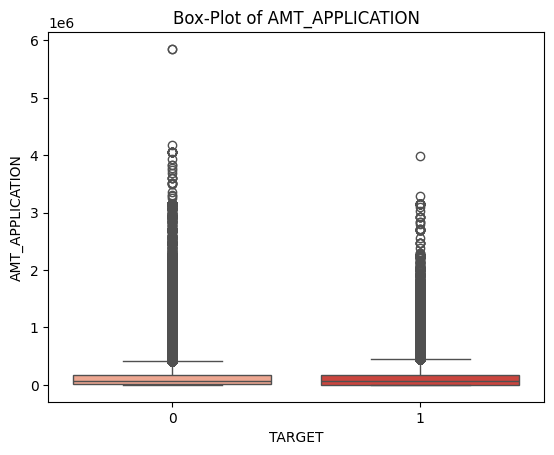

AMT_CREDIT
Non-defaulters: count    1.033268e+06
mean     1.967635e+05
std      3.201673e+05
min      0.000000e+00
25%      2.534400e+04
50%      8.099550e+04
75%      2.156400e+05
max      4.509688e+06
Name: AMT_CREDIT, dtype: float64
Defaulters: count    9.762300e+04
mean     1.930914e+05
std      3.142824e+05
min      0.000000e+00
25%      2.020500e+04
50%      7.448850e+04
75%      2.250000e+05
max      3.524220e+06
Name: AMT_CREDIT, dtype: float64


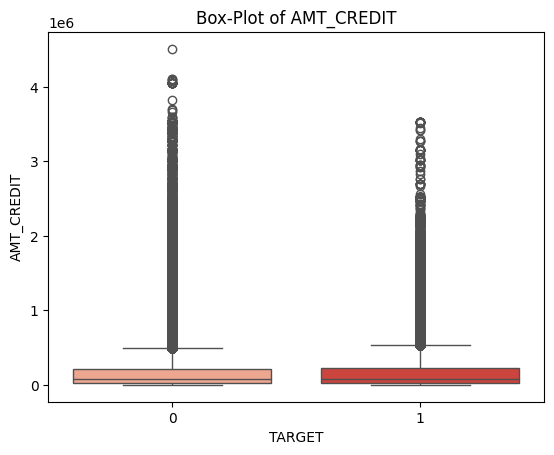

AMT_DOWN_PAYMENT
Non-defaulters: count    4.903550e+05
mean     6.784889e+03
std      2.125049e+04
min     -9.000000e-01
25%      0.000000e+00
50%      1.809000e+03
75%      7.915500e+03
max      3.060045e+06
Name: AMT_DOWN_PAYMENT, dtype: float64
Defaulters: count    4.055300e+04
mean     5.470812e+03
std      2.267898e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      6.071400e+03
max      2.135700e+06
Name: AMT_DOWN_PAYMENT, dtype: float64


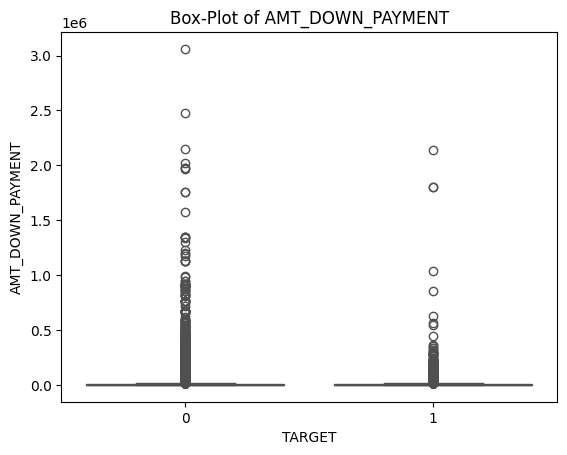

AMT_GOODS_PRICE
Non-defaulters: count    8.021630e+05
mean     2.266336e+05
std      3.168268e+05
min      0.000000e+00
25%      5.017500e+04
50%      1.102500e+05
75%      2.295000e+05
max      5.850000e+06
Name: AMT_GOODS_PRICE, dtype: float64
Defaulters: count    7.318400e+04
mean     2.256916e+05
std      3.092723e+05
min      0.000000e+00
25%      4.630500e+04
50%      1.107000e+05
75%      2.360138e+05
max      3.982500e+06
Name: AMT_GOODS_PRICE, dtype: float64


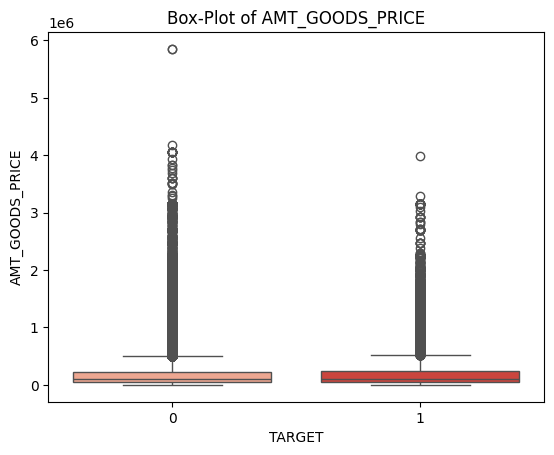

In [55]:
for c in payment_cols:
    print(c)
    print(f'Non-defaulters: {non_default[c].describe()}')
    print(f'Defaulters: {default[c].describe()}')
    test.box_plot(y=c, data_to_plot=prev_merged)


- AMT_ANNUITY, AMT_CREDIT của nhóm non-default cao hơn nhóm default, các quantile không lệch nhau nhiều
- Tỉ lệ khách hàng có AMT_APPLICATION = 0 của nhóm defaulter cao hơn nhóm non - defaulter rất nhiều => Khách hàng có AMT_APPLICATION thấp hơn thường là defaulter
- Tỉ lệ AMT_DOWN_PAYMENT giống AMT_APPLICATION

=> Các biến PAYMENT có vẻ quan trọng hơn đó là:
- AMT_DOWN_PAYMENT, AMT_APPLICATION, RATE_DOWN_PAYMENT

# Percentage of defaulter

In [56]:
cat_col = prev_merged.select_dtypes(include=['object']).columns

NAME_CONTRACT_TYPE


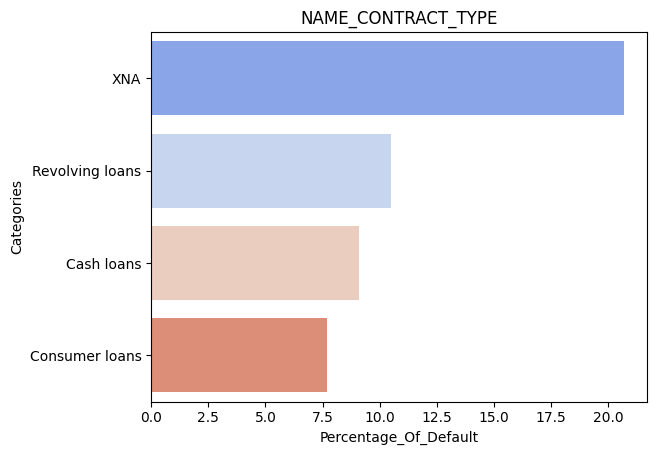

WEEKDAY_APPR_PROCESS_START


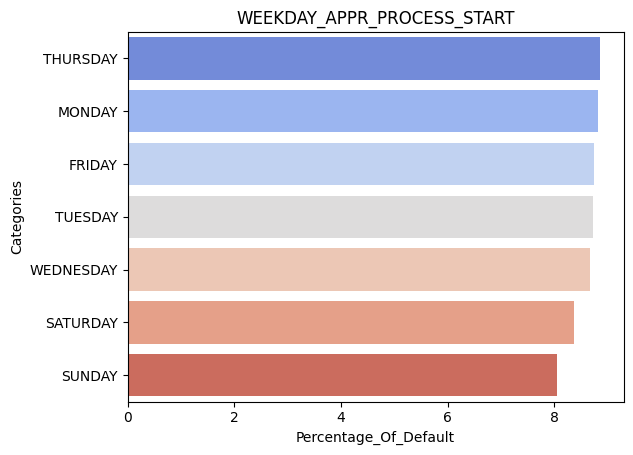

FLAG_LAST_APPL_PER_CONTRACT


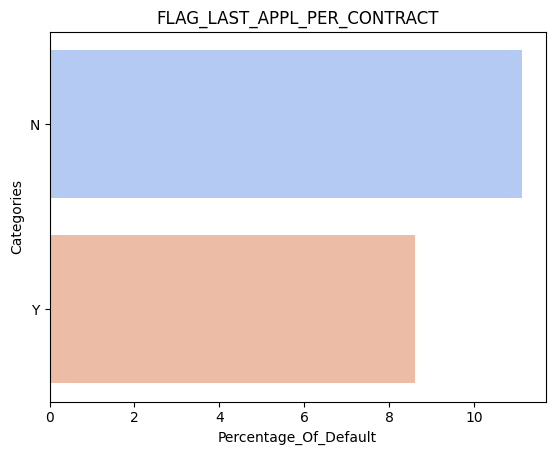

NAME_CASH_LOAN_PURPOSE


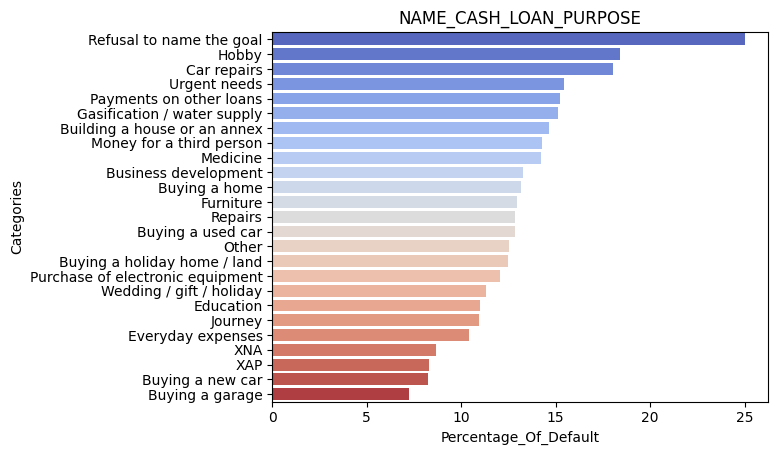

NAME_CONTRACT_STATUS


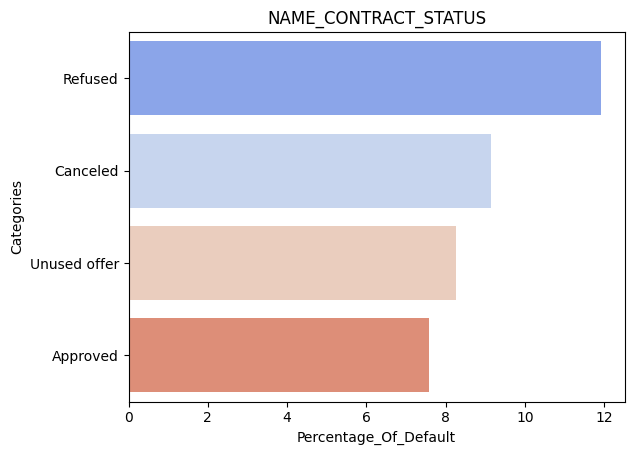

NAME_PAYMENT_TYPE


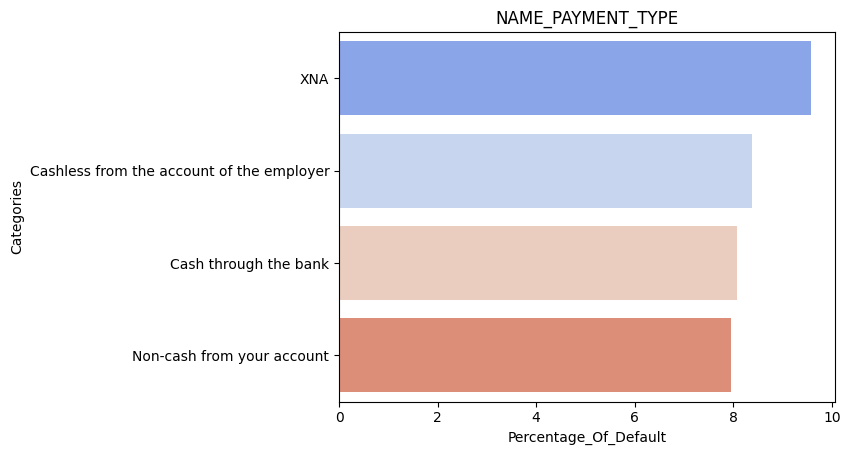

CODE_REJECT_REASON


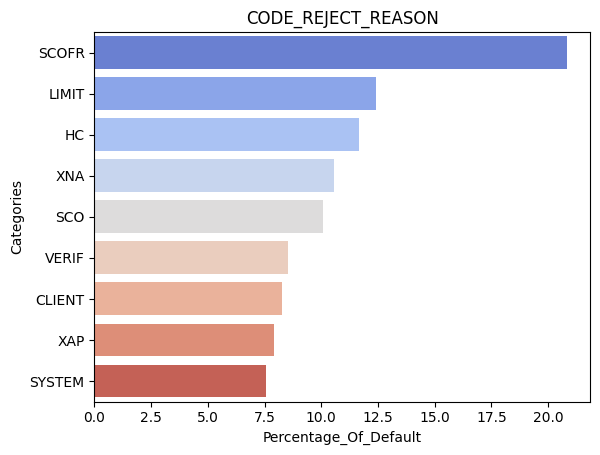

NAME_TYPE_SUITE


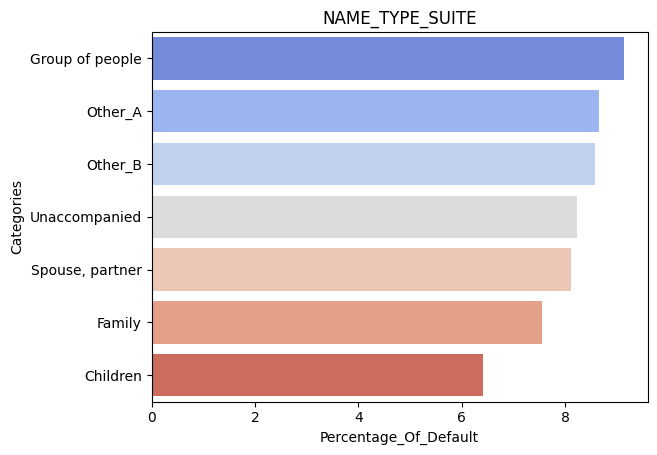

NAME_CLIENT_TYPE


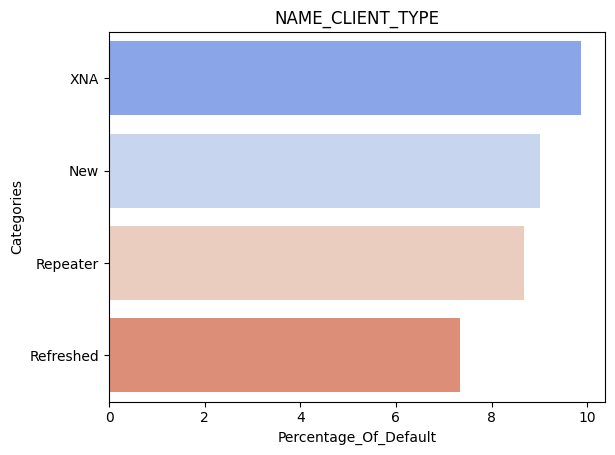

NAME_GOODS_CATEGORY


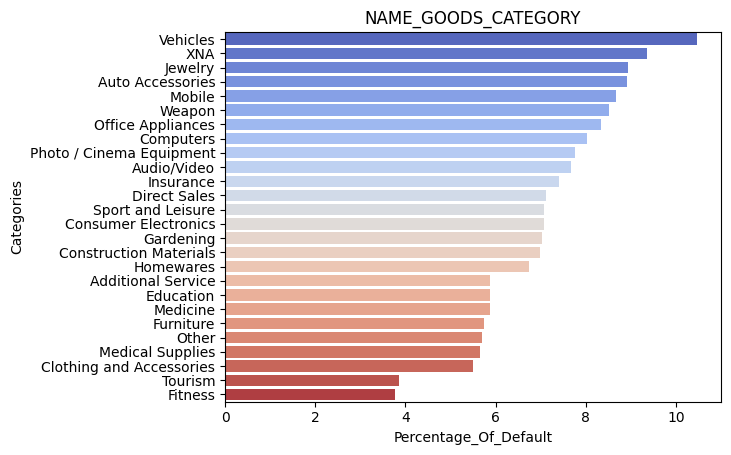

NAME_PORTFOLIO


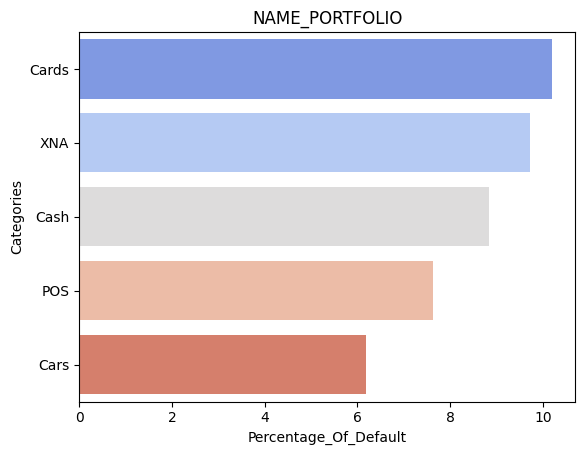

NAME_PRODUCT_TYPE


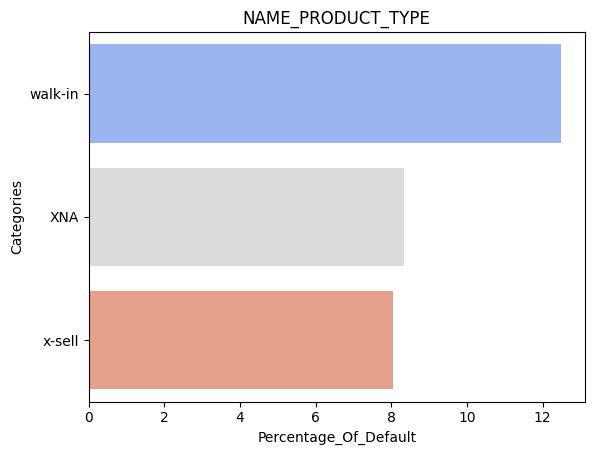

CHANNEL_TYPE


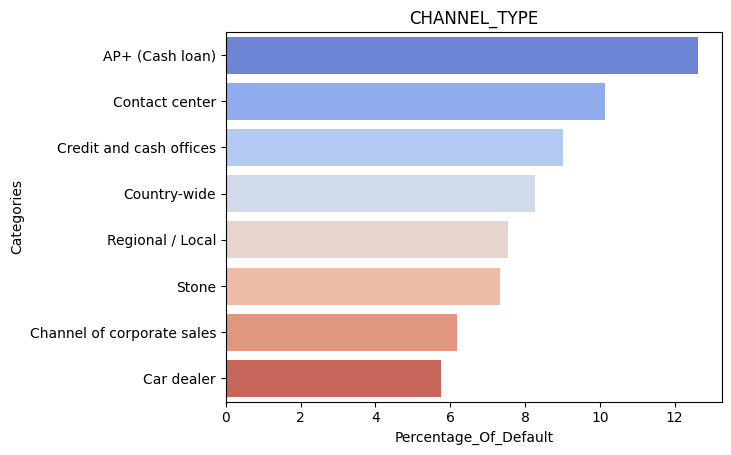

NAME_SELLER_INDUSTRY


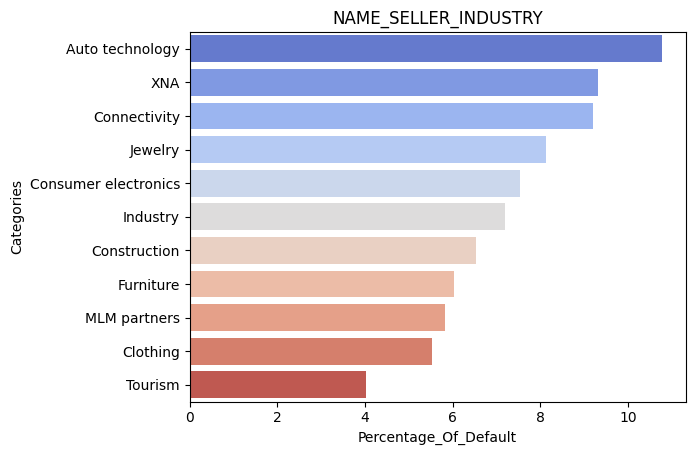

NAME_YIELD_GROUP


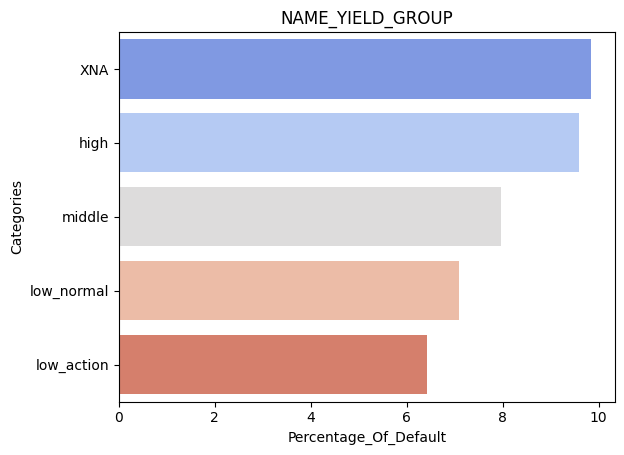

PRODUCT_COMBINATION


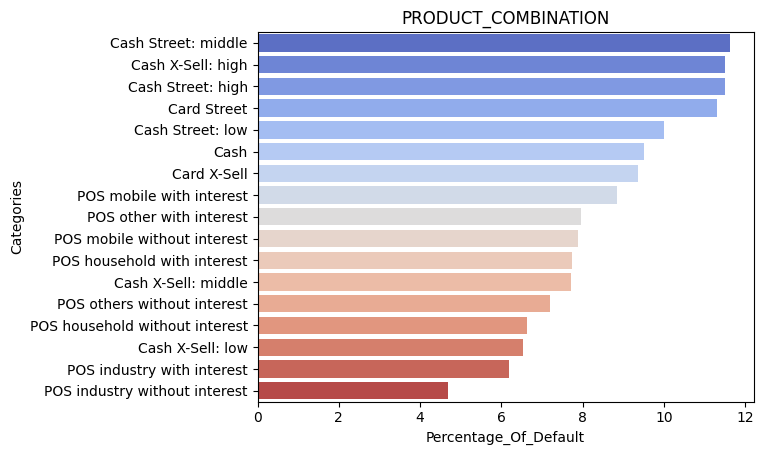

In [57]:
for c in cat_col:
    print(c)
    test.percentage_of_defauter_per_cat(prev_merged, c)


- Customers refuse to name the goal of loan are the most likely to become the defaulters
- Customers who are XNA are the most likely to become the defaulters
- Customers who is rejected because of SCOFR are the most likely to become defaulters
- Customers who has channel_tyle are AP+ are the most likely to become defaulters
- People apply to buy Vehicles are the most likely to become defaulters
- Customers who have product combination is Cash Street are the most likely to become defaulters

# Phân tích các biến feature engineering


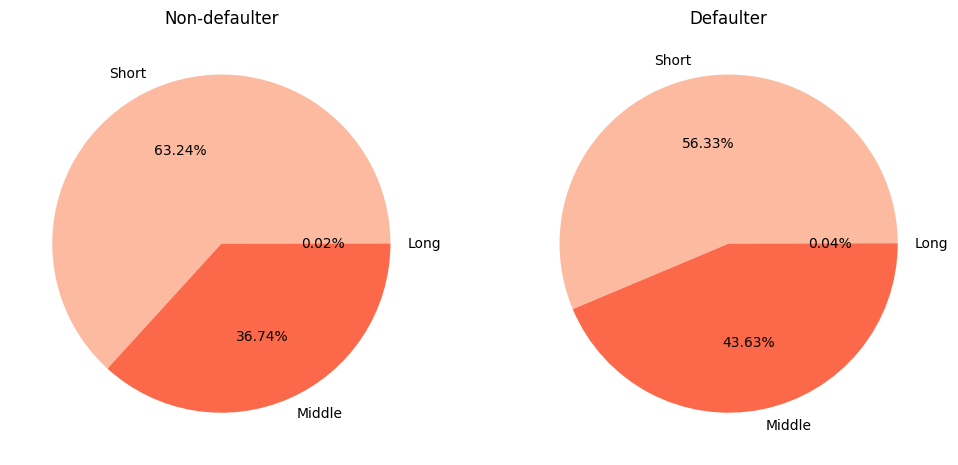

In [58]:
test.pie_plot("NEW_CNT_PAYMENT", df1=non_default, df2=default)

Đặc trưng về thời gian trả nợ giữa hai nhóm giống nhau. Đối với nhóm defaulter, tỷ lệ người có thời hạn trả nợ trung bình và dài cao hơn một chút

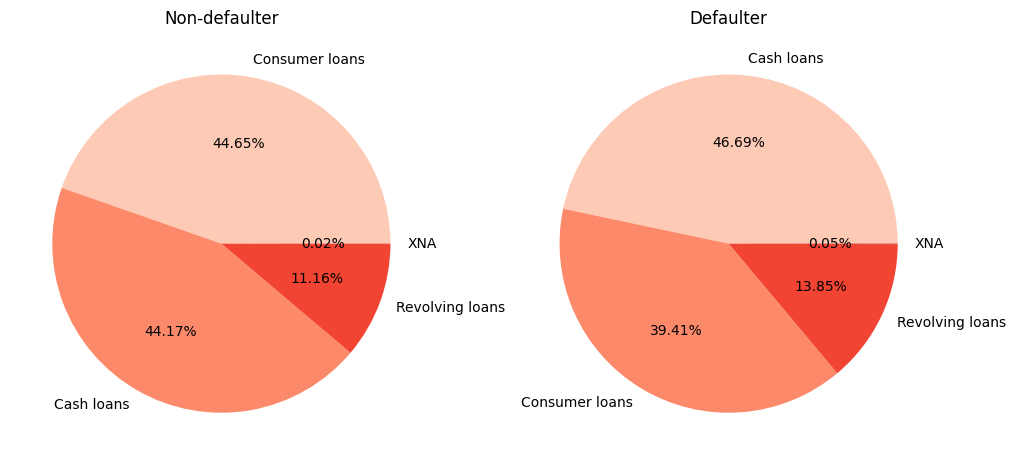

In [59]:
test.pie_plot("NAME_CONTRACT_TYPE", df1=non_default, df2=default)

Nhóm vỡ nợ thường có xu hướng có loại hình khoàn vay là Cash loan

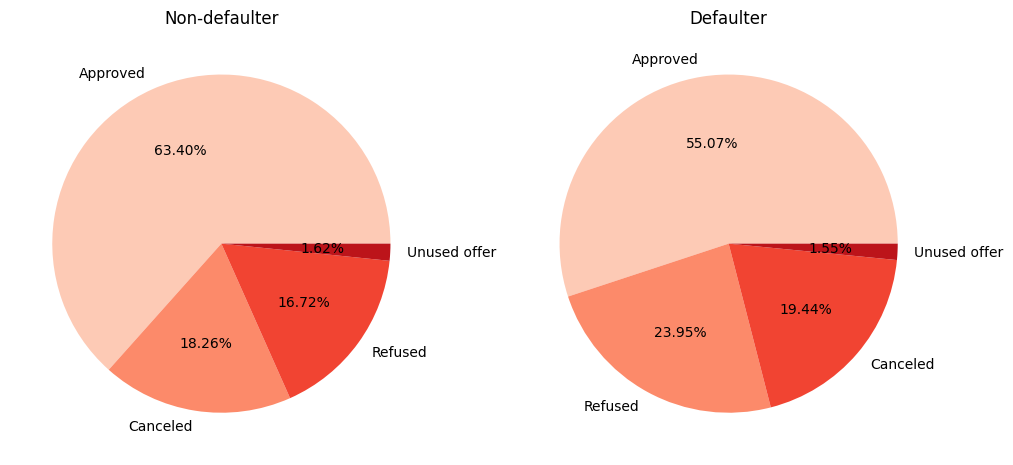

In [60]:
test.pie_plot("NAME_CONTRACT_STATUS", df1=non_default, df2=default)

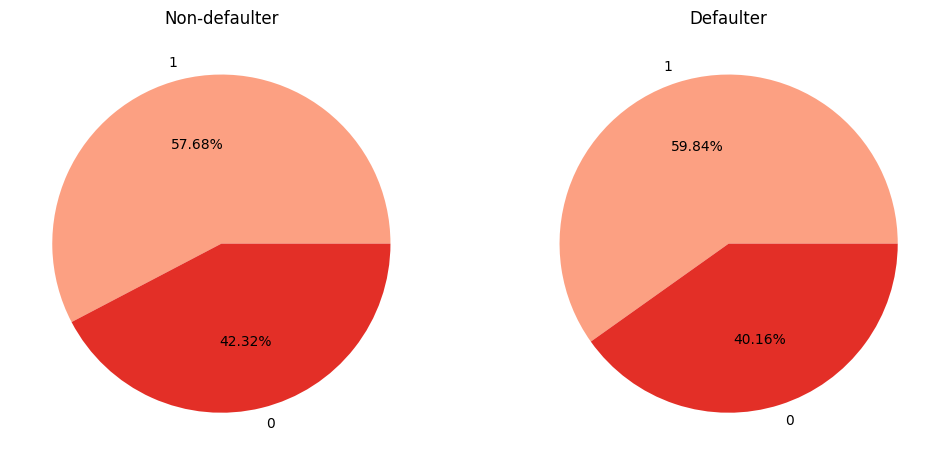

In [61]:
test.pie_plot("NEW_APP_CREDIT_RATE_RATIO", df1=non_default, df2=default)